<a href="https://colab.research.google.com/github/KarolineCostadaSilva/otimizacao_computacao_evolucionaria/blob/main/Projeto_efici%C3%AAncia_energ%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pós-Graduação Lato Sensu em Ciências de Dados

---------------------------------------------------------------
**Universidade Federal de Pernambuco - UFPE**

**Centro de Informática - CIN**

**Pós-Graduação Lato Sensu em Ciências de Dados**

**Disciplina: OTIMIZAÇÃO E COMPUTAÇÃO EVOLUCIONÁRIA**

**Discentes: Karoline J. Costa da Silva e Michele Vanessa Sercundes Nunes**

**Docente: Prof. Dr. Adiel Teixeira de Almeida Filho**

**Auxiliar: Julio Cezar Soares Silva**

---------------------------------------------------------------

1. Problema de Ciência de Dados
- Forest Fires Dataset: Utilizado para um problema de regressão visando prever a área queimada com base em condições climáticas e índices de incêndio.
- Energy Efficiency Dataset: Aplicado a um problema de regressão para prever a eficiência energética de edifícios com base na carga de aquecimento, em suas características.

2. Uso dos Datasets
- Forest Fires Dataset: Explorar como diferentes condições climáticas e índices de incêndio influenciam a área queimada.
- Energy Efficiency Dataset: Analisar quais características dos edifícios são mais determinantes para a sua eficiência energética.

3. Aplicação dos Algoritmos de Otimização

Algoritmo Genético e PSO: Estes algoritmos foram usados para otimizar os hiperparâmetros dos modelos de regressão que desenvolvi para cada dataset.

4. Critérios de Análise e Comparação

Avaliar o desempenho dos algoritmos de otimização com base em:
- Tempo de execução
- Qualidade da solução (MSE)
- Número de gerações/iterações até a convergência

5. Cenários de Teste

Testar diferentes configurações de hiperparâmetros para cada algoritmo de otimização.

Analisar o impacto da quantidade de features nos resultados.

6. Análise dos Resultados

Comparar os resultados dos algoritmos de otimização com benchmark ElasticNet.
Apresentar estatísticas descritivas e gráficos (boxplot) para mostrar a convergência e a qualidade das soluções.

Tsanas,Athanasios and Xifara,Angeliki. (2012). Energy efficiency. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

https://archive.ics.uci.edu/dataset/242/energy+efficiency

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.

https://archive.ics.uci.edu/dataset/162/forest+fires

In [ ]:
!pip install TPOT pyswarm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 524.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=2db0fdd8be78741574b498b9afba72639f60cb257c30722b5b9c39a336ba5643
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=41dbe9628fa9cd655b5239aeb93472ad135c67a7c2cf42e2813ab386ec34cd4d
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built pyswarm stopit


In [ ]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error
from pyswarm import pso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.feature_selection import SelectKBest, f_regression


In [ ]:
# Caminhos dos arquivos zip
corrected_zip_files = ['/content/forest+fires.zip', '/content/energy+efficiency.zip']

extracted_folders_corrected = []

for zip_file in corrected_zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        # Extrai para uma pasta com o mesmo nome do arquivo zip
        extract_folder = zip_file.replace('.zip', '').replace('+', '_')
        zip_ref.extractall(extract_folder)
        extracted_folders_corrected.append(extract_folder)

extracted_folders_corrected


['/content/forest_fires', '/content/energy_efficiency']

In [ ]:
# Preparação dos Dados
# Forest Fires Dataset

# Carregar os dados
forest_fires = pd.read_csv('/content/forest_fires/forestfires.csv')

# Pré-processamento
# Transformar variáveis categóricas (mês, dia) em numéricas
categorical_features = ['month', 'day']
numeric_features = forest_fires.drop(['area', 'month', 'day'], axis=1).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separar em features e target
X_forest = forest_fires.drop('area', axis=1)
y_forest = forest_fires['area']

# Dividir em conjuntos de treino e teste
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X_forest, y_forest, test_size=0.2, random_state=42)

# Aplicar o preprocessamento
X_train_forest = preprocessor.fit_transform(X_train_forest)
X_test_forest = preprocessor.transform(X_test_forest)


In [ ]:
# Energy Efficiency Dataset

# Carregar os dados
energy_efficiency = pd.read_excel('/content/energy_efficiency/ENB2012_data.xlsx')

# Dividir em features e target
X_energy = energy_efficiency.drop('Y1', axis=1)
y_energy = energy_efficiency['Y1'] # Pode escolher Y1 ou Y2 dependendo do seu foco

# Normalizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_energy)

# Dividir em conjuntos de treino e teste
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_scaled, y_energy, test_size=0.2, random_state=42)


# EDA

## EDA Forest Fires Dataset

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).

In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function.

Then, several Data Mining methods were applied. After fitting the models, the outputs were post-processed with the inverse of the ln(x+1) transform. Four different input setups were used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value: 12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The best RMSE was attained by the naive mean predictor.

For more information, read [Cortez and Morais, 2007].
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [ ]:
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# Checking for missing values and data types
missing_values = forest_fires.isnull().sum()
data_types = forest_fires.dtypes

missing_values, data_types


(X        0
 Y        0
 month    0
 day      0
 FFMC     0
 DMC      0
 DC       0
 ISI      0
 temp     0
 RH       0
 wind     0
 rain     0
 area     0
 dtype: int64,
 X          int64
 Y          int64
 month     object
 day       object
 FFMC     float64
 DMC      float64
 DC       float64
 ISI      float64
 temp     float64
 RH         int64
 wind     float64
 rain     float64
 area     float64
 dtype: object)

O conjunto de dados não possui valores ausentes e os tipos de dados parecem apropriados para cada coluna. As colunas 'month' e 'day' são categóricas (objeto), enquanto o restante é numérico.

In [ ]:
# Statistical summary of the dataset
statistical_summary = forest_fires.describe().T
statistical_summary


,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


O resumo estatístico fornece insights sobre o conjunto de dados:

Count: Existem 517 entradas.

Média, STD (Desvio Padrão): Fornece informações sobre tendência central e dispersão para cada variável numérica.

Min, Max: Mostra o intervalo de valores para cada variável numérica.

Quartis (25%, 50%, 75%): Indicam a distribuição dos dados numéricos.

A seguir, visualizei os dados para entender melhor a distribuição de cada recurso e a variável target ('área').

Histogramas e box plots para cada recurso numérico para ver a distribuição de valores e identificar possíveis discrepâncias.

Gráficos de barras para features categóricas ('month' e 'day') para entender sua distribuição.

Gráficos de dispersão para observar as relações entre os recursos e a variável de destino ('área').

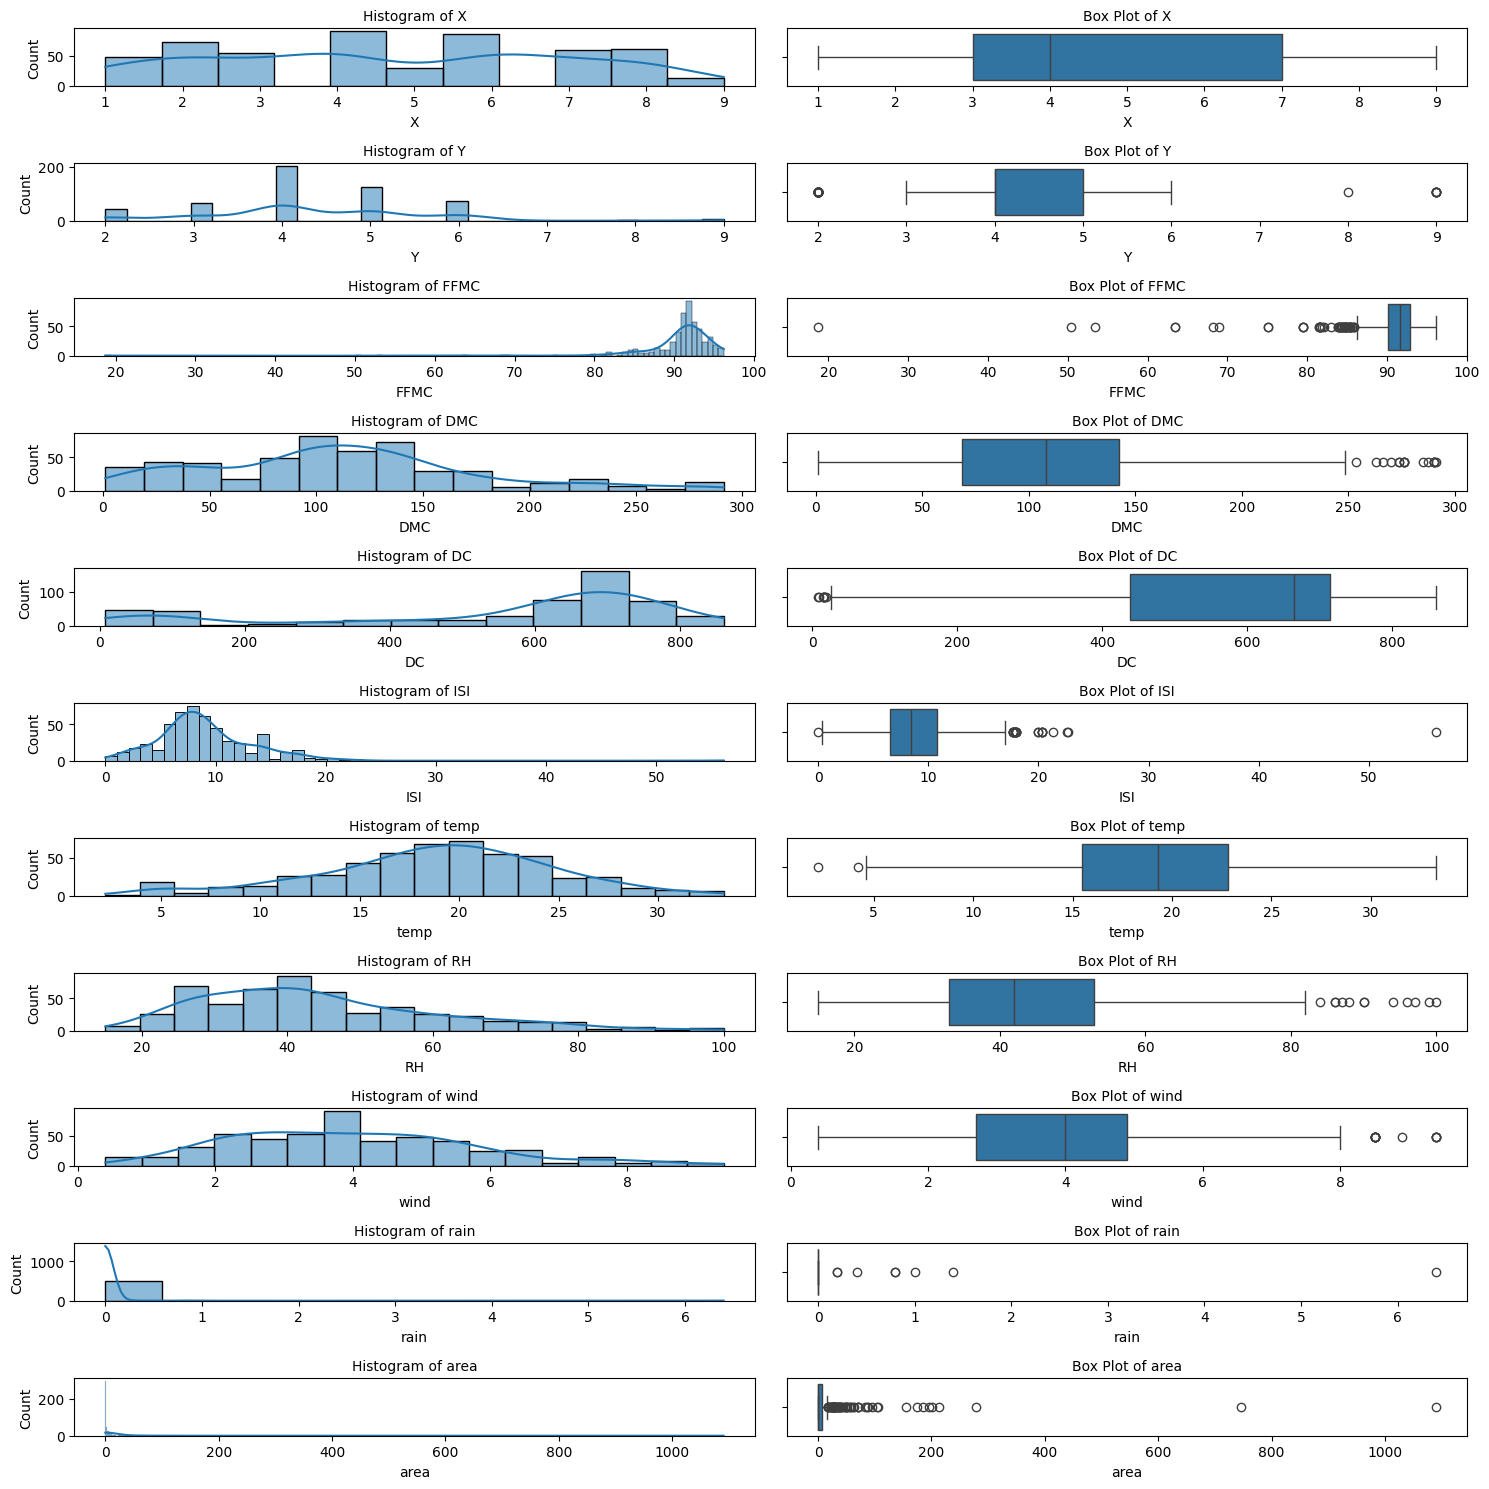

In [ ]:
# Filtering out the numerical and categorical columns
numerical_columns = forest_fires.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = forest_fires.select_dtypes(include=['object']).columns

# Plotting histograms and box plots for each numerical variable
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 15))
for i, col in enumerate(numerical_columns):
    sns.histplot(forest_fires[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=10)
    sns.boxplot(x=forest_fires[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=10)

plt.tight_layout()
plt.show()


Histogramas: mostram a distribuição de frequência. Algumas variáveis, como 'área', estão fortemente inclinadas para valores mais baixos.

Box Plots: Indica a mediana, quartis e possíveis outliers. Várias variáveis, especialmente a “área”, parecem ter um número significativo de outliers, o que é típico de variáveis que representam coisas como a área queimada em incêndios florestais.

A seguir, visualizei as variáveis categóricas ('month' e 'day') usando gráficos de barras para entender sua distribuição de frequência no conjunto de dados. Depois disso, criei gráficos de dispersão para explorar as relações entre os recursos numéricos e a variável target ('área').

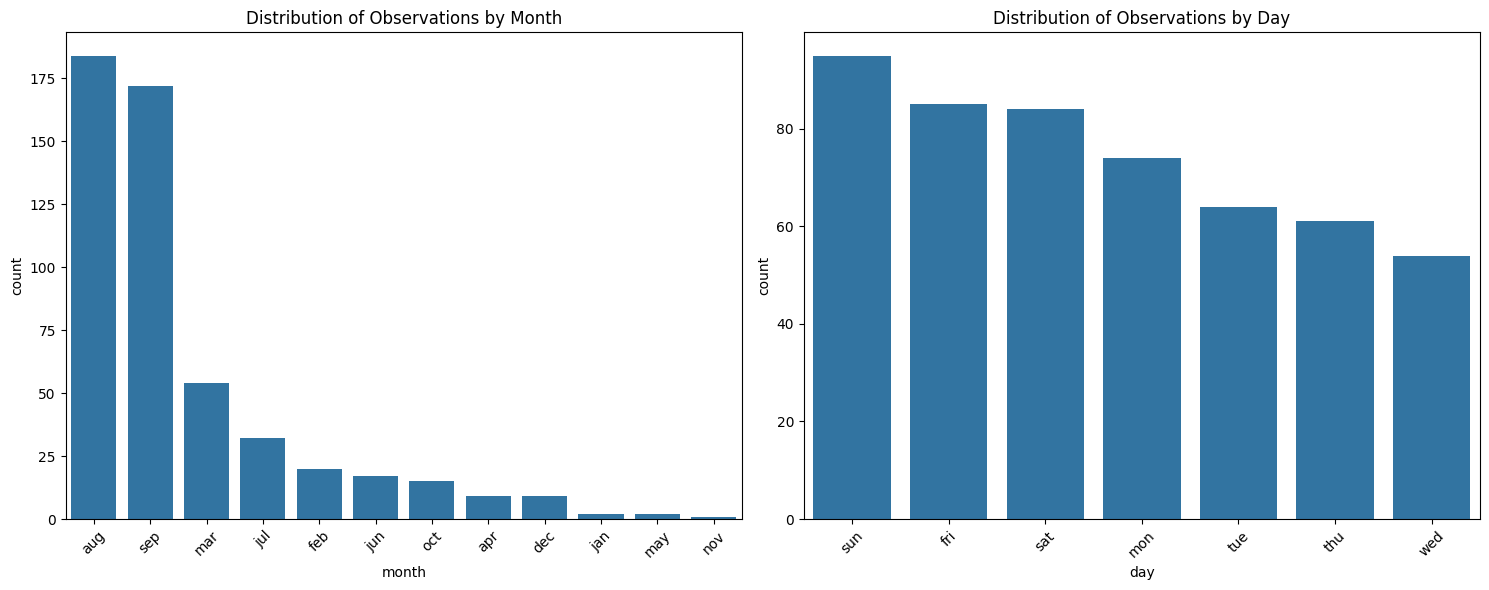

In [ ]:
# Plotting bar charts for categorical variables 'month' and 'day'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Month
sns.countplot(x='month', data=forest_fires, ax=axes[0], order=forest_fires['month'].value_counts().index)
axes[0].set_title('Distribution of Observations by Month')
axes[0].tick_params(axis='x', rotation=45)

# Day
sns.countplot(x='day', data=forest_fires, ax=axes[1], order=forest_fires['day'].value_counts().index)
axes[1].set_title('Distribution of Observations by Day')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Observa-se que os meses de Agosto e Setembro são os meses com mais incidências de incêndios. Essa distribuição corrobora pois os meses Agosto e Setembro são meses de verão em Portugal.

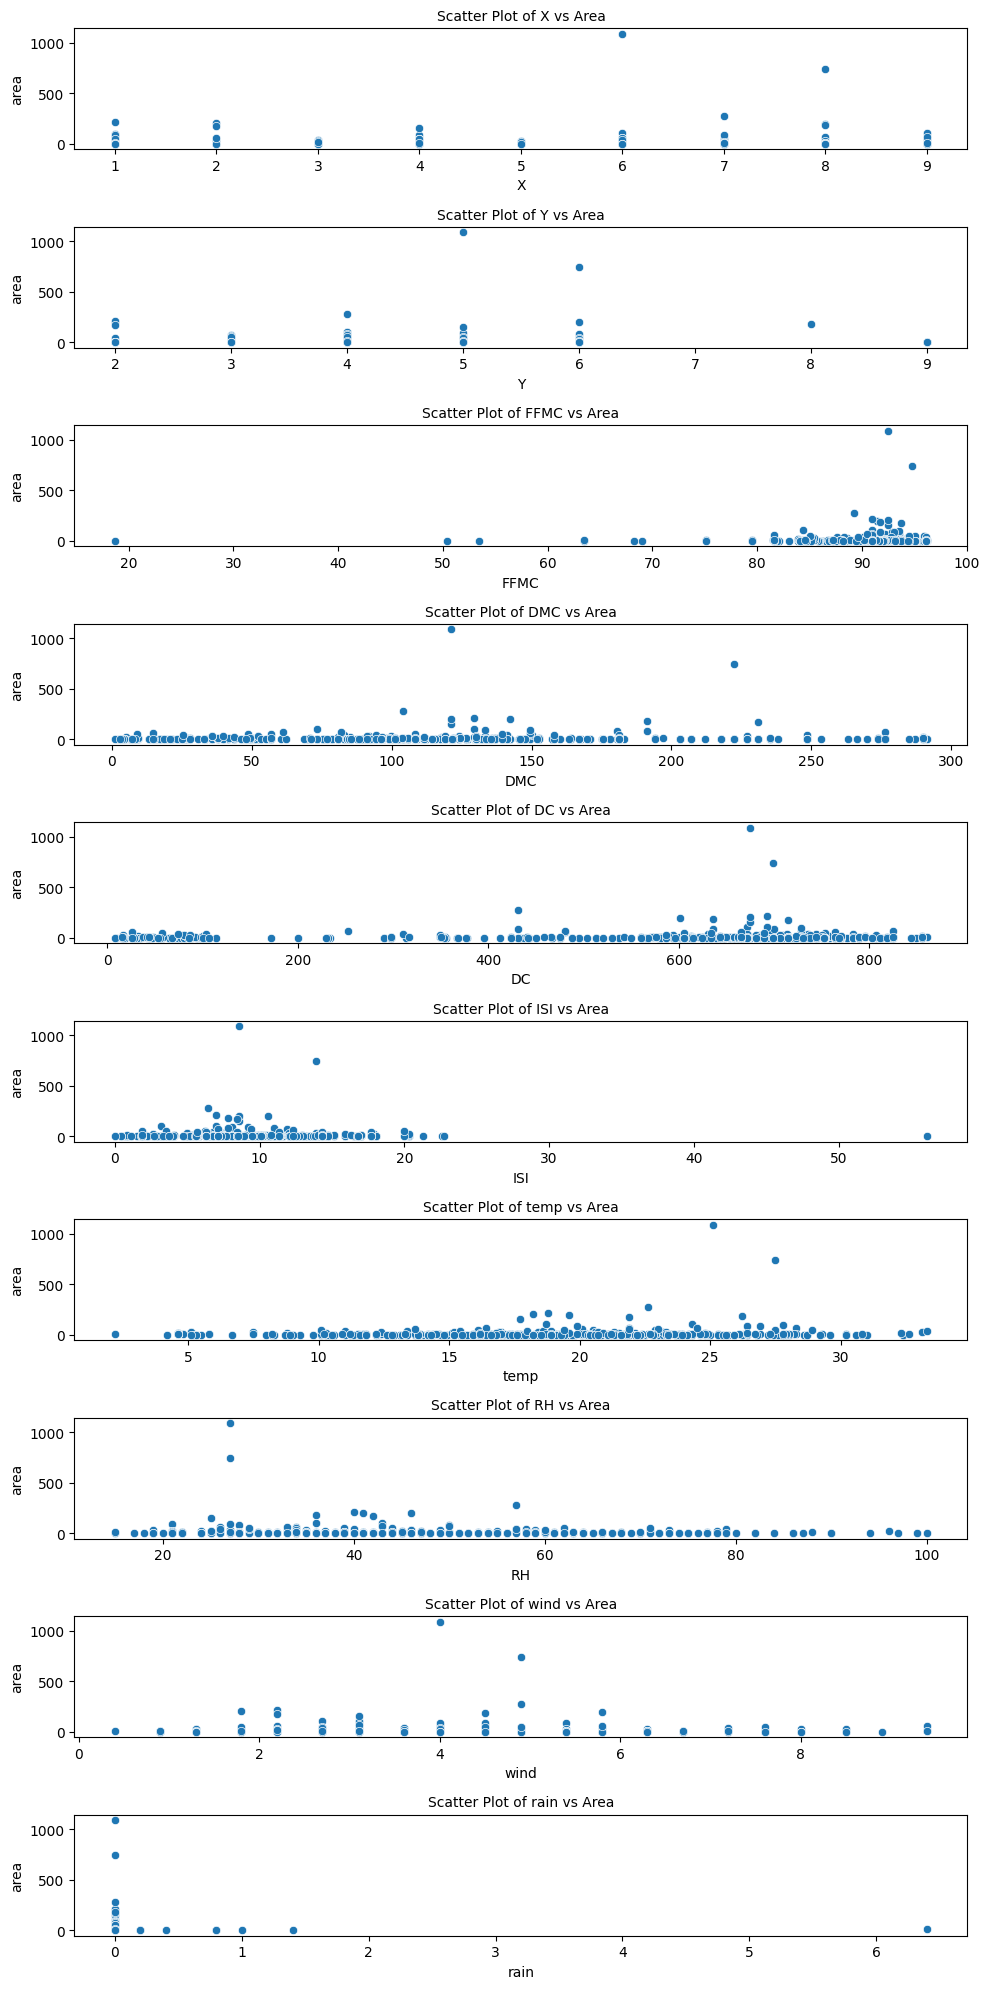

In [ ]:
# Creating scatter plots for each numerical feature against the target variable 'area'
fig, axes = plt.subplots(nrows=len(numerical_columns) - 1, ncols=1, figsize=(10, 20))  # excluding 'area' itself

for i, col in enumerate(numerical_columns):
    if col != 'area':  # Exclude the target variable itself
        sns.scatterplot(x=forest_fires[col], y=forest_fires['area'], ax=axes[i])
        axes[i].set_title(f'Scatter Plot of {col} vs Area', fontsize=10)

plt.tight_layout()
plt.show()


Os gráficos de dispersão ilustram as relações entre cada característica numérica e a variável target 'área'. Parece que a variável target  tem muitos valores concentrados na faixa inferior, o que é típico em conjuntos de dados relativos a fenômenos naturais como incêndios florestais.

Vou calcular e visualizar a matriz de correlação. Isto irá ajudar-nos a compreender como as diferentes variáveis numéricas estão relacionadas entre si e particularmente com a área dos incêndios florestais.

<ipython-input-12-c575d5415cdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = forest_fires.corr()


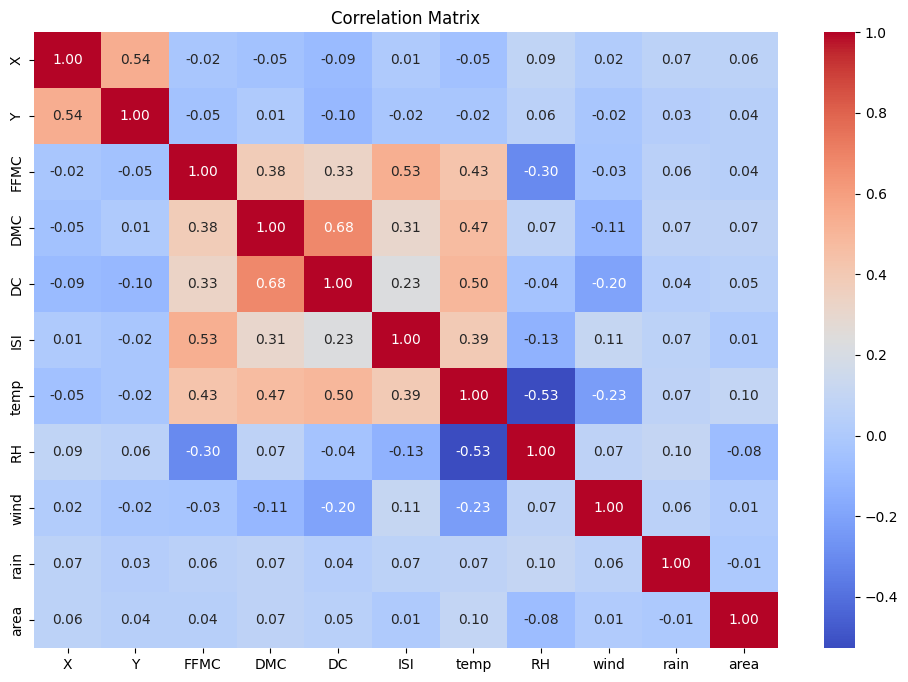

In [ ]:
# Computing the correlation matrix
correlation_matrix = forest_fires.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Algumas variáveis apresentam correlação moderada a alta entre si. Por exemplo, variáveis relacionadas com índices meteorológicos de incêndio (como FFMC, DMC, DC) tendem a apresentar algum grau de correlação.

A variável target apresenta uma correlação relativamente baixa com a maioria das outras variáveis.

## EDA Energy Efficiency Dataset

This dataset looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
- X1	Relative Compactness
- X2	Surface Area
- X3	Wall Area
- X4	Roof Area
- X5	Overall Height
- X6	Orientation
- X7	Glazing Area
- X8	Glazing Area Distribution
- y1	Heating Load
- y2	Cooling Load

In [ ]:
energy_efficiency.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# Checking for missing values and data types
missing_values = energy_efficiency.isnull().sum()
data_types = energy_efficiency.dtypes

missing_values, data_types


(X1    0
 X2    0
 X3    0
 X4    0
 X5    0
 X6    0
 X7    0
 X8    0
 Y1    0
 Y2    0
 dtype: int64,
 X1    float64
 X2    float64
 X3    float64
 X4    float64
 X5    float64
 X6      int64
 X7    float64
 X8      int64
 Y1    float64
 Y2    float64
 dtype: object)

Não há valores ausentes no conjunto de dados. Os tipos de dados são principalmente float64, sendo X6 e X8 int64.

In [ ]:
# Statistical summary of the dataset
statistical_summary = energy_efficiency.describe().T
statistical_summary


,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


O resumo estatístico fornece os seguintes insights:

Count: Cada coluna possui 768 entradas, confirmando que não há dados faltantes.

Média, STD (desvio padrão): dão-nos uma ideia da tendência central e da dispersão de cada variável.

Min, Max: Esses valores mostram o intervalo de cada variável.

Quartis (25%, 50%, 75%): Indicam a distribuição e dispersão dos dados.

A seguir, visualizarei os dados para entender melhor a distribuição de cada recurso e variável de destino. Isso incluirá:

Histogramas para cada feature  para ver a distribuição dos valores.
Box plots para identificar possíveis discrepâncias.
Gráficos de dispersão para observar relações entre feature e target.

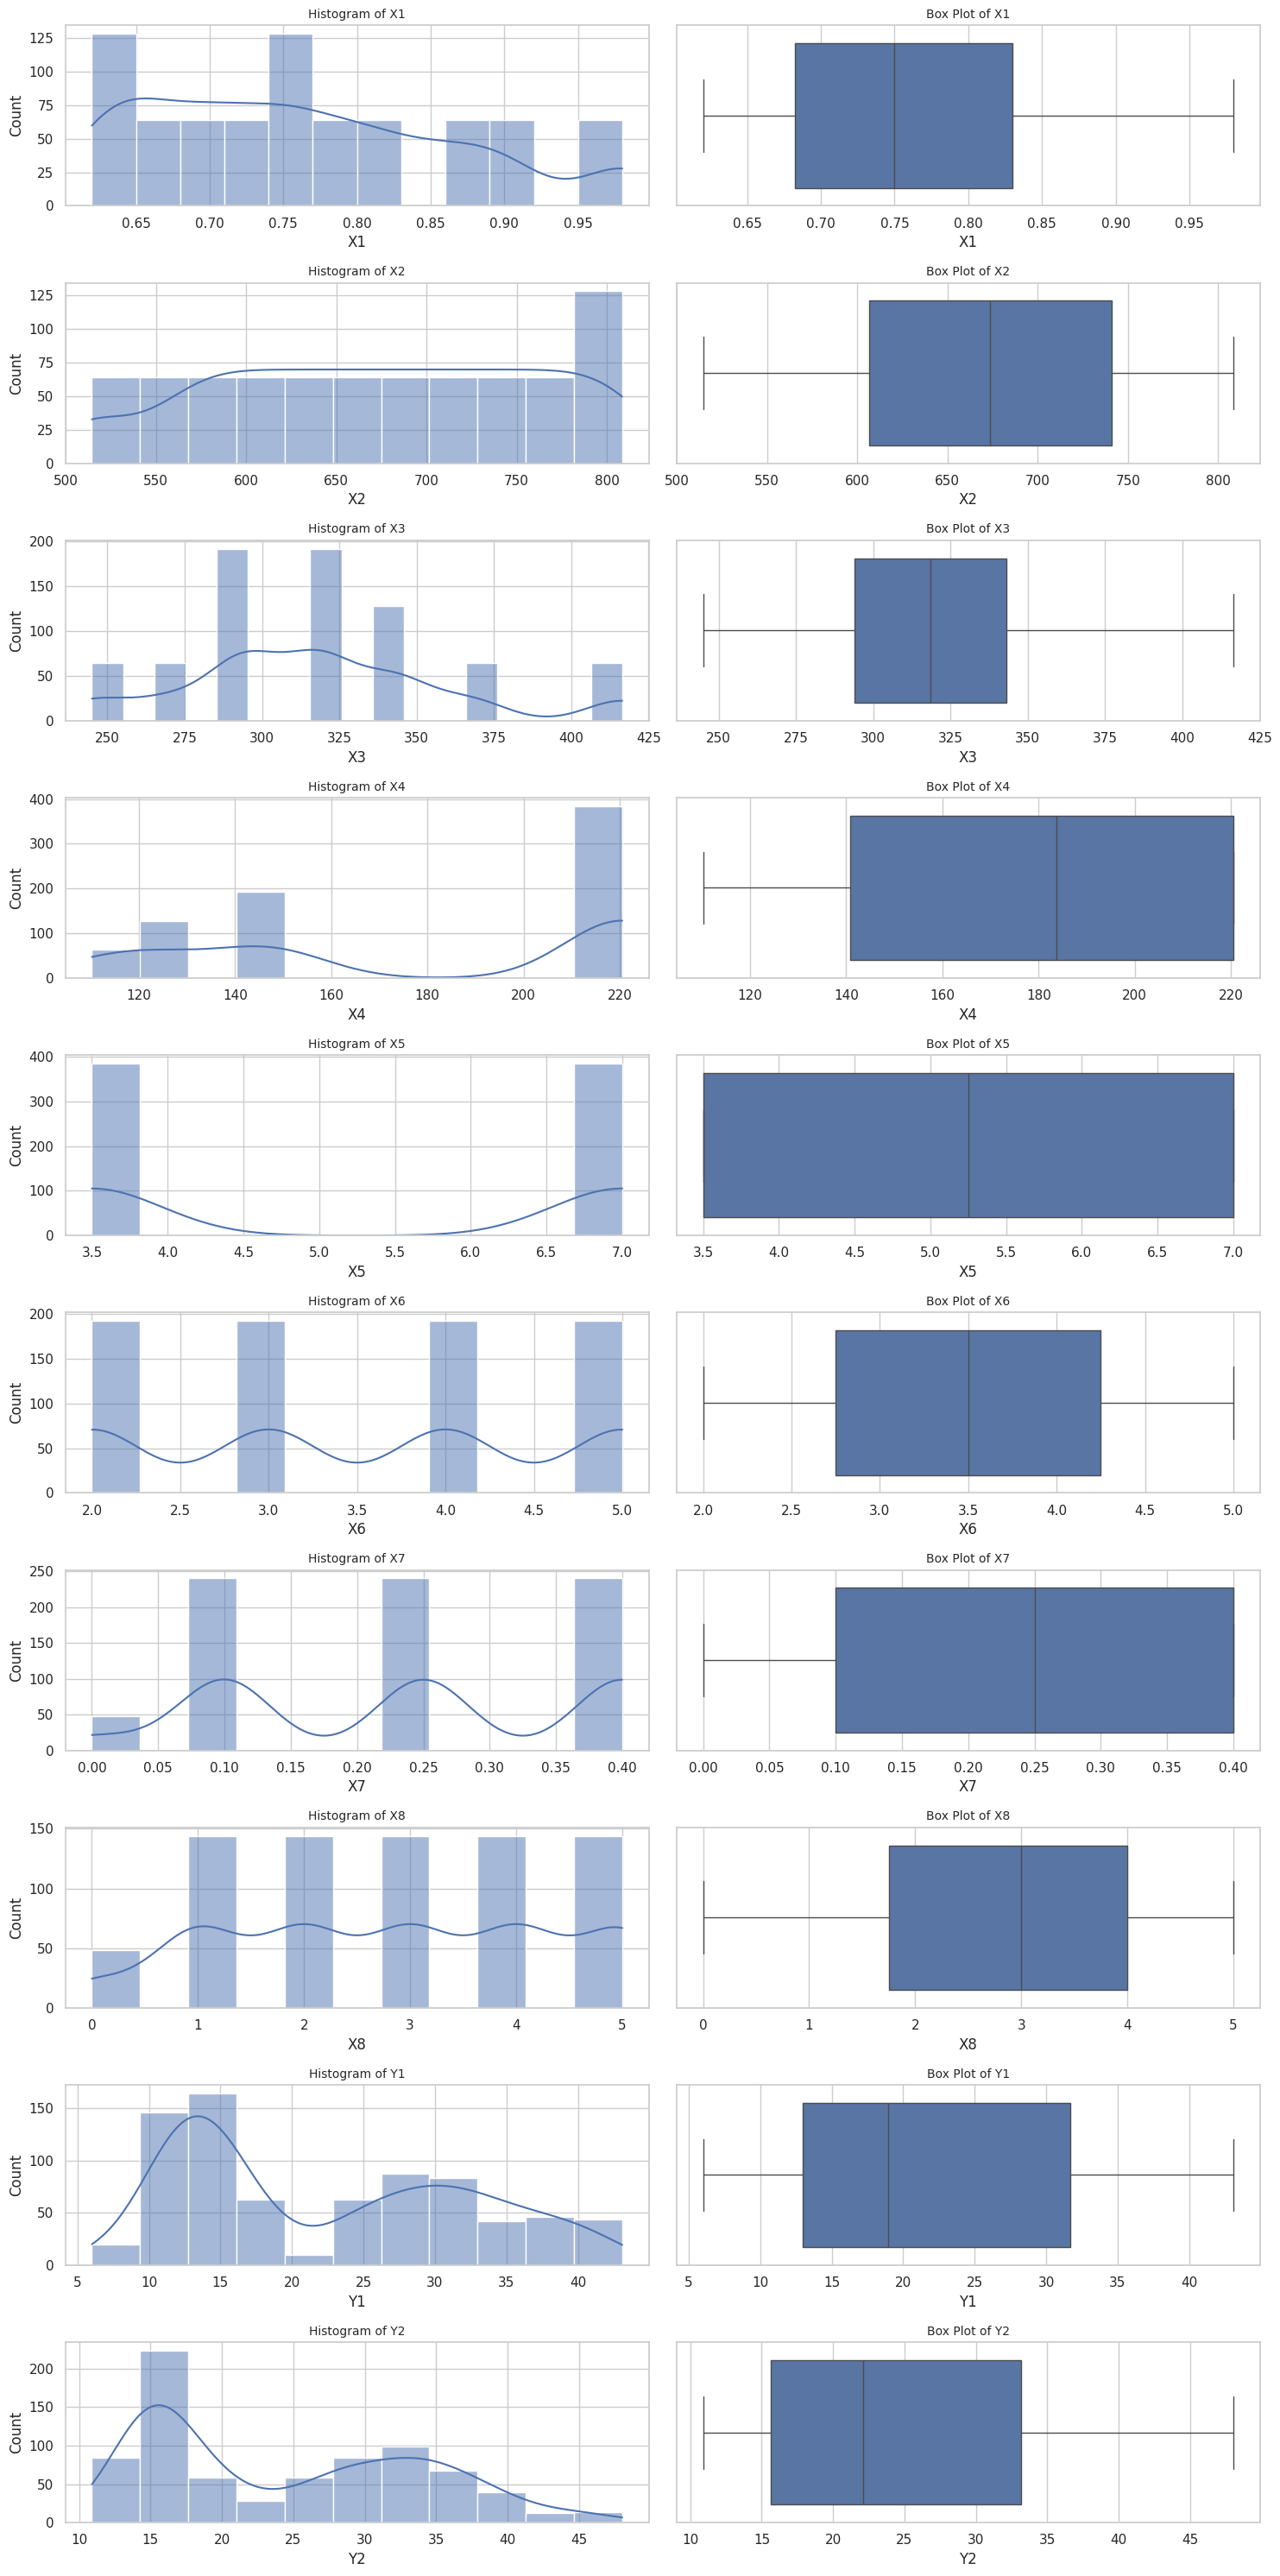

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting histograms and box plots for each variable
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 30))
for i, col in enumerate(energy_efficiency.columns):
    sns.histplot(energy_efficiency[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=10)
    sns.boxplot(x=energy_efficiency[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=10)

plt.tight_layout()
plt.show()


Os histogramas e box plots fornecem uma representação visual da distribuição e possíveis outliers para cada variável:

Histogramas: Mostram a distribuição de frequência de cada variável. Algumas variáveis exibem uma distribuição multimodal.


A seguir, criei gráficos de dispersão para visualizar as relações entre cada recurso e as variáveis de destino (Y1 e Y2). Isso nos ajudará a entender se há alguma relação aparente linear ou não linear entre eles.

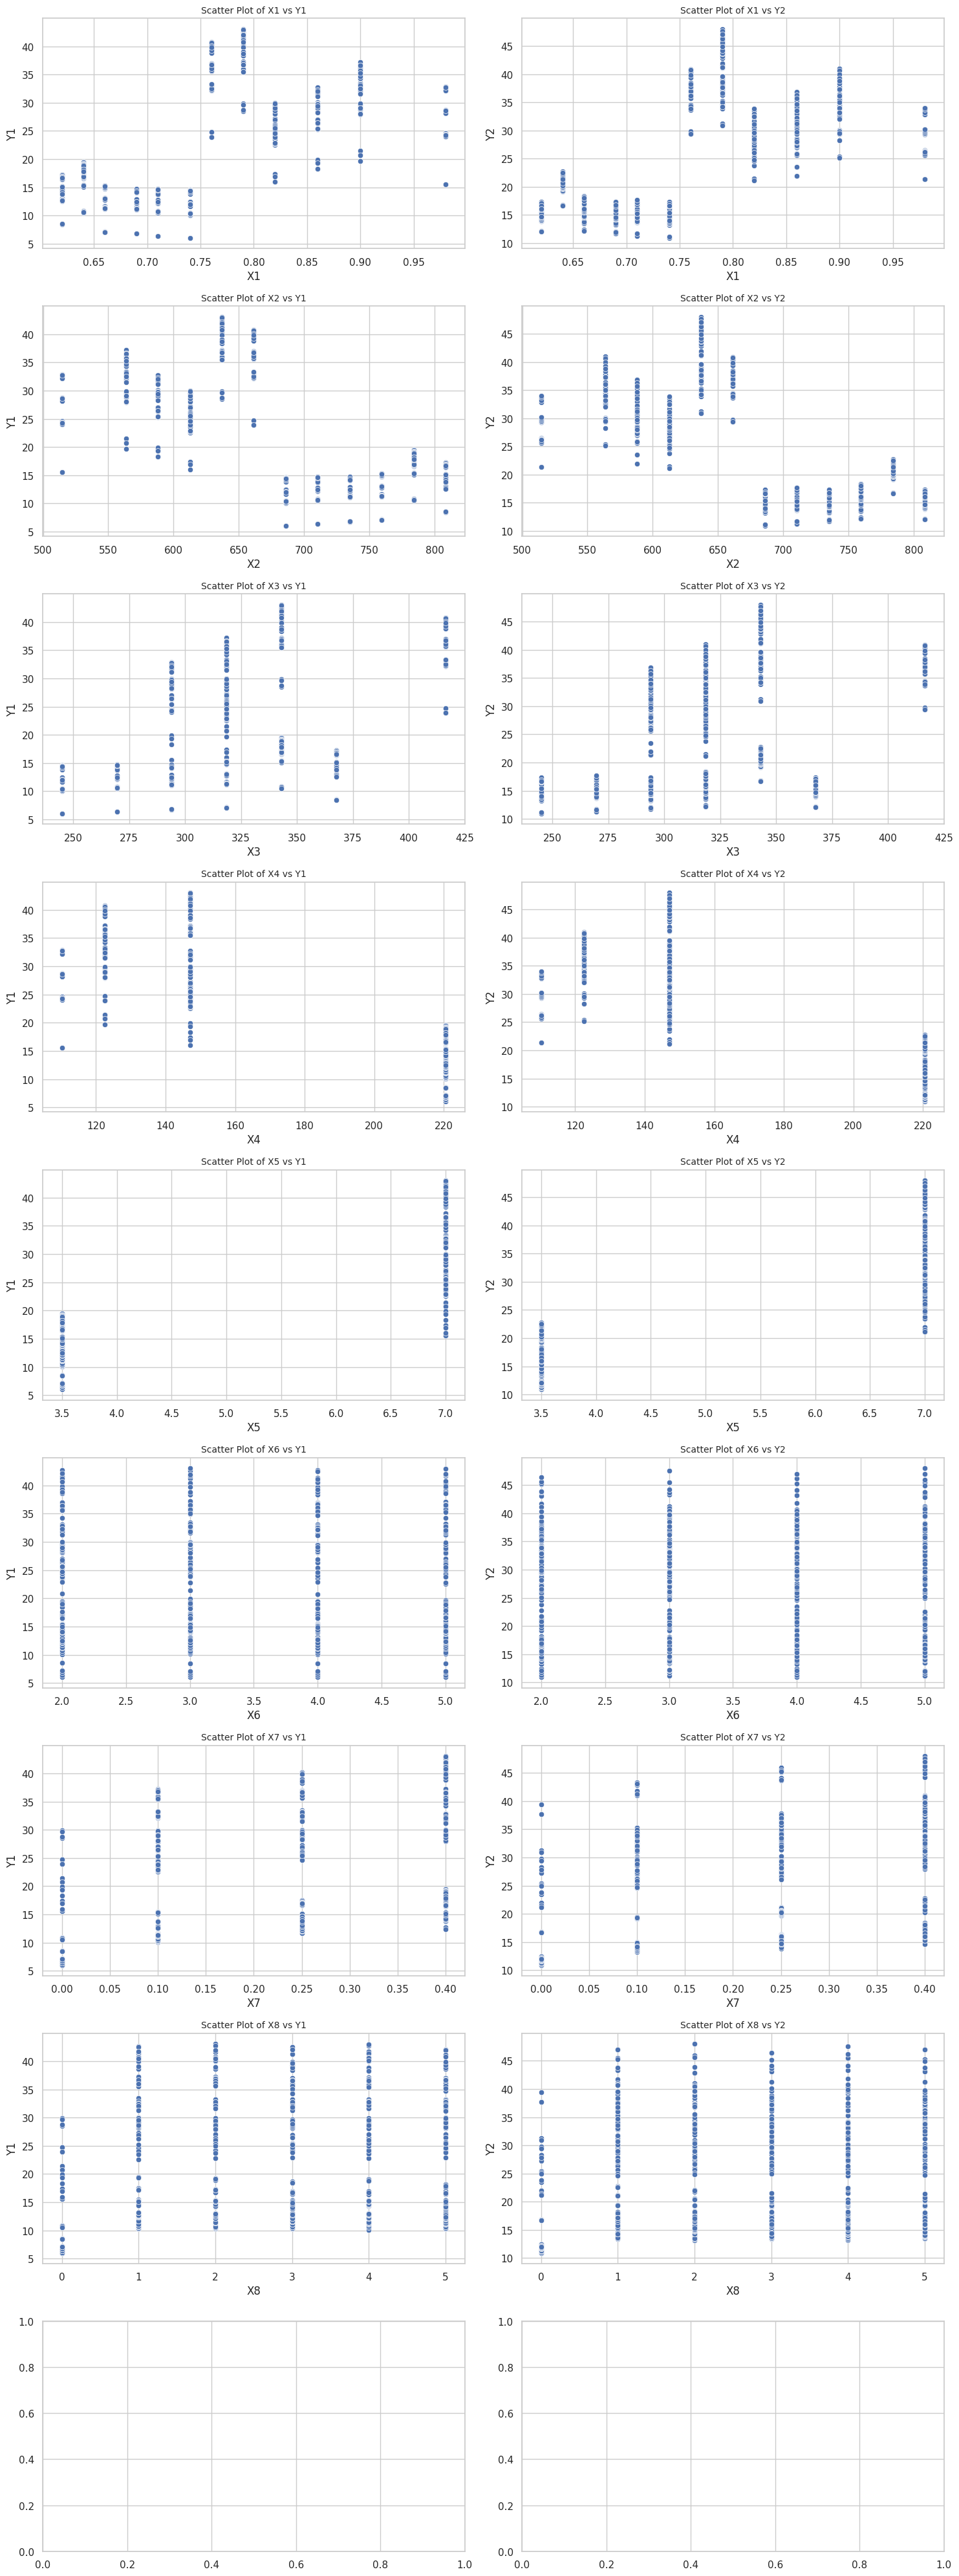

In [ ]:
# Creating scatter plots for each feature against the target variables Y1 and Y2
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 40))
feature_columns = energy_efficiency.columns[:-2]

for i, col in enumerate(feature_columns):
    sns.scatterplot(x=energy_efficiency[col], y=energy_efficiency['Y1'], ax=axes[i, 0])
    axes[i, 0].set_title(f'Scatter Plot of {col} vs Y1', fontsize=10)
    sns.scatterplot(x=energy_efficiency[col], y=energy_efficiency['Y2'], ax=axes[i, 1])
    axes[i, 1].set_title(f'Scatter Plot of {col} vs Y2', fontsize=10)

plt.tight_layout()
plt.show()


Algumas features mostram um padrão ou tendência claro quando plotados em relação a Y1 e Y2, indicando possíveis relacionamentos.

Outras características não apresentam uma tendência distinta, sugerindo relações mais complexas.

Vou conduzir uma análise de correlação. Isso envolve a criação de uma matriz de correlação para entender como cada recurso se correlaciona com os outros, incluindo as variáveis-alvo. Isto pode destacar potenciais relações e dependências entre variáveis.

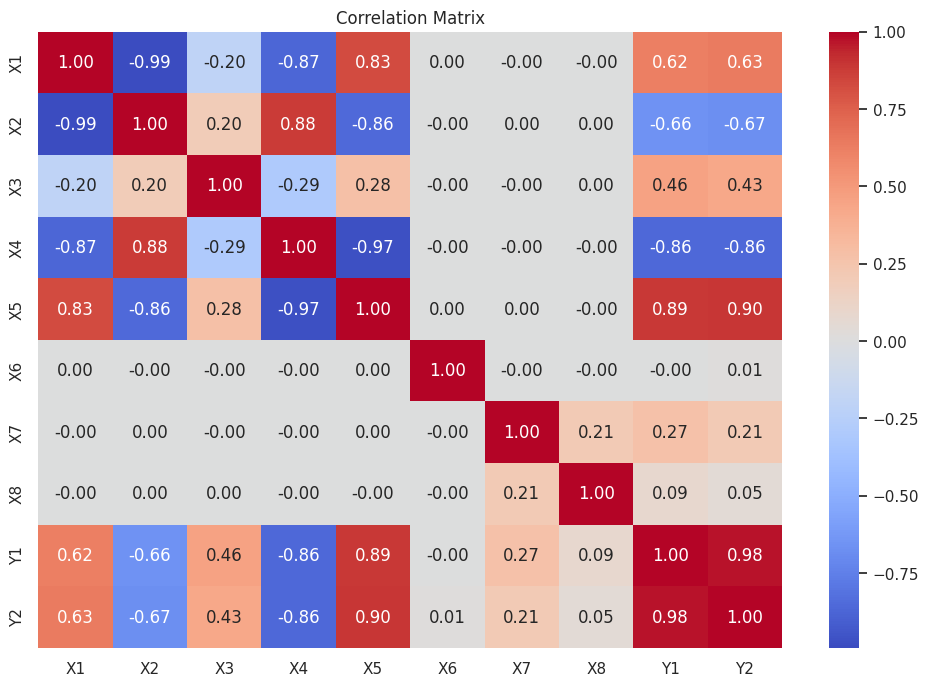

In [ ]:
# Computing the correlation matrix
correlation_matrix = energy_efficiency.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Label Y1 e Y2: forte correlação positiva com as features X5.

Correlação positiva com as features X1, X3 e X7.

Forte correlação negativa com a feature X4.

Correlação negativa com a feature X2.

----

# GA e PSO

In [ ]:
# Desenvolvimento de Modelos de Regressão
# Regressão linear

# Modelo para o dataset de incêndios florestais
model_forest_fires = LinearRegression()
model_forest_fires.fit(X_train_forest, y_train_forest)

# Modelo para o dataset de eficiência energética
model_energy_efficiency = LinearRegression()
model_energy_efficiency.fit(X_train_energy, y_train_energy)


LinearRegression()

GA + forest dataset

In [ ]:
# Configuração para o TPOT Regressor
tpot_config = {
    'sklearn.linear_model.LinearRegression': {
    }
}

# Instanciar e treinar o TPOT Regressor
tpot_regressor = TPOTRegressor(generations=10, population_size=1000, verbosity=2, config_dict=tpot_config)
tpot_regressor.fit(X_train_forest, y_train_forest)


Optimization Progress:   0%|          | 0/11000 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2228.672151605423

Generation 2 - Current best internal CV score: -2228.672151605423

Generation 3 - Current best internal CV score: -2228.672151605423

Generation 4 - Current best internal CV score: -2228.672151605423

Generation 5 - Current best internal CV score: -2228.672151605423

Generation 6 - Current best internal CV score: -2228.672151605423

Generation 7 - Current best internal CV score: -2228.672151605423

Generation 8 - Current best internal CV score: -2227.999837114562

Generation 9 - Current best internal CV score: -2227.999837114562

Generation 10 - Current best internal CV score: -2227.3602372463547

Best pipeline: LinearRegression(CombineDFs(CombineDFs(input_matrix, input_matrix), LinearRegression(LinearRegression(input_matrix))))


TPOTRegressor(config_dict={'sklearn.linear_model.LinearRegression': {}},
              generations=10, population_size=1000, verbosity=2)

GA + energy dataset

In [ ]:
# Algoritmo Genético
# Configuração para o TPOT Regressor
tpot_config = {
    'sklearn.linear_model.LinearRegression': {
    }
}

# Instanciar e treinar o TPOT Regressor
tpot_regressor = TPOTRegressor(generations=10, population_size=1000, verbosity=2, config_dict=tpot_config)
tpot_regressor.fit(X_train_energy, y_train_energy)


Optimization Progress:   0%|          | 0/11000 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3.0724567358507007

Generation 2 - Current best internal CV score: -3.050278298152982

Generation 3 - Current best internal CV score: -3.0334557009023433

Generation 4 - Current best internal CV score: -2.978160313624355

Generation 5 - Current best internal CV score: -2.978160313624355

Generation 6 - Current best internal CV score: -2.978160313624355

Generation 7 - Current best internal CV score: -2.978160313624355

Generation 8 - Current best internal CV score: -2.950824014314096

Generation 9 - Current best internal CV score: -2.950824014314096

Generation 10 - Current best internal CV score: -2.950824014314096

Best pipeline: LinearRegression(LinearRegression(LinearRegression(LinearRegression(LinearRegression(LinearRegression(CombineDFs(input_matrix, input_matrix)))))))


TPOTRegressor(config_dict={'sklearn.linear_model.LinearRegression': {}},
              generations=10, population_size=1000, verbosity=2)

In [ ]:
# Avaliar o modelo para o dataset de incêndios florestais
y_pred_forest_fires = model_forest_fires.predict(X_test_forest)
mse_forest_fires = mean_squared_error(y_test_forest, y_pred_forest_fires)
print(f'MSE para Forest Fires: {mse_forest_fires}')

# Avaliar o modelo para o dataset de eficiência energética
y_pred_energy_efficiency = model_energy_efficiency.predict(X_test_energy)
mse_energy_efficiency = mean_squared_error(y_test_energy, y_pred_energy_efficiency)
print(f'MSE para Energy Efficiency: {mse_energy_efficiency}')


MSE para Forest Fires: 11613.674532130444
MSE para Energy Efficiency: 3.752884255922585


PSO + Forest dataset

In [ ]:
# Particle Swarm Optimization (PSO)

# Definir a função objetivo para o PSO
def objective_function_forest(hyperparameters):
    # Cria um modelo com os hiperparâmetros atuais
    model = Ridge(alpha=hyperparameters[0])

    # Treina o modelo
    model.fit(X_train_forest, y_train_forest)

    # Faz previsões no conjunto de teste
    predictions = model.predict(X_test_forest)

    # Calcula o MSE como a função objetivo
    mse = mean_squared_error(y_test_forest, predictions)

    return mse

# Definir limites para os hiperparâmetros
lb = [0.001]
ub = [10]

# Executar o PSO
best_hyperparams_forest, best_mse_forest = pso(objective_function_forest, lb, ub)

print("Melhores hiperparâmetros:", best_hyperparams_forest)
print("MSE com melhores hiperparâmetros:", best_mse_forest)

Stopping search: maximum iterations reached --> 100
Melhores hiperparâmetros: [0.001]
MSE com melhores hiperparâmetros: 11613.706076124172


PSO + energy dataset

In [ ]:
# Definir a função objetivo para o PSO
def objective_function_energy(hyperparameters):
    # Cria um modelo com os hiperparâmetros atuais
    model = Ridge(alpha=hyperparameters[0])

    # Treina o modelo
    model.fit(X_train_energy, y_train_energy)

    # Faz previsões no conjunto de teste
    predictions = model.predict(X_test_energy)

    # Calcula o MSE como a função objetivo
    mse = mean_squared_error(y_test_energy, predictions)

    return mse

# Definir limites para os hiperparâmetros
lb = [0.001]
ub = [10]

# Executar o PSO
best_hyperparams_energy, best_mse_energy = pso(objective_function_energy, lb, ub)

print("Melhores hiperparâmetros:", best_hyperparams_energy)
print("MSE com melhores hiperparâmetros:", best_mse_energy)

Stopping search: maximum iterations reached --> 100
Melhores hiperparâmetros: [0.001]
MSE com melhores hiperparâmetros: 3.7819480975351802


# Diferentes cenários para GA e PSO

In [ ]:
# GA + Forest Dataset
parameters_tpot = {
    'generation': [5, 10],
    'population_size': [20, 50],
    'mutation_rate': [0.1, 0.2],
    'crossover_rate': [0.1, 0.2]
}

for g in parameters_tpot['generation']:
    for p in parameters_tpot['population_size']:
        for m in parameters_tpot['mutation_rate']:
            for c in parameters_tpot['crossover_rate']:
                start_time = time.time()

                tpot = TPOTRegressor(generations=g, population_size=p,
                                     mutation_rate=m, crossover_rate=c,
                                     verbosity=2, random_state=42)
                tpot.fit(X_train_forest, y_train_forest)

                elapsed_time = time.time() - start_time
                print(f"TPOT - Generation: {g}, Population: {p}, Mutation: {m}, Crossover: {c}")
                print(f"Score: {tpot.score(X_test_forest, y_test_forest)}")
                print(f"Tempo de execução: {elapsed_time} segundos")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2090.9502825123204

Generation 3 - Current best internal CV score: -2082.825897934939

Generation 4 - Current best internal CV score: -2082.825897934939

Generation 5 - Current best internal CV score: -2073.7059511332873

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.8500000000000001, tol=0.1)
TPOT - Generation: 5, Population: 20, Mutation: 0.1, Crossover: 0.1
Score: -11797.864350312522
Tempo de execução: 41.1547064781189 segundos


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2074.8246616802817

Generation 3 - Current best internal CV score: -2074.8246616802817

Generation 4 - Current best internal CV score: -2074.8246616802817

Generation 5 - Current best internal CV score: -2074.8246616802817

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.01)
TPOT - Generation: 5, Population: 20, Mutation: 0.1, Crossover: 0.2
Score: -11799.274085304329
Tempo de execução: 53.2064847946167 segundos


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2090.9502825123204

Generation 3 - Current best internal CV score: -2083.1916635250473

Generation 4 - Current best internal CV score: -2083.1916635250473

Generation 5 - Current best internal CV score: -2083.1916635250473

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.25, tol=0.001)
TPOT - Generation: 5, Population: 20, Mutation: 0.2, Crossover: 0.1
Score: -11797.523212473207
Tempo de execução: 51.95621299743652 segundos


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2090.9502825123204

Generation 3 - Current best internal CV score: -2090.9502825123204

Generation 4 - Current best internal CV score: -2086.564414092375

Generation 5 - Current best internal CV score: -2082.825897934939

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.25, tol=0.1)
TPOT - Generation: 5, Population: 20, Mutation: 0.2, Crossover: 0.2
Score: -11797.500298596355
Tempo de execução: 74.99900269508362 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2068.8149020277565

Generation 2 - Current best internal CV score: -2068.8149020277565

Generation 3 - Current best internal CV score: -2068.8149020277565

Generation 4 - Current best internal CV score: -2068.8149020277565

Generation 5 - Current best internal CV score: -2068.8149020277565

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=30, p=2, weights=distance)
TPOT - Generation: 5, Population: 50, Mutation: 0.1, Crossover: 0.1
Score: -11853.475072622094
Tempo de execução: 69.47844409942627 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2058.2689505089634

Generation 2 - Current best internal CV score: -2058.2689505089634

Generation 3 - Current best internal CV score: -2058.2689505089634

Generation 4 - Current best internal CV score: -2058.2689505089634

Generation 5 - Current best internal CV score: -2058.2689505089634

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=32, p=2, weights=uniform)
TPOT - Generation: 5, Population: 50, Mutation: 0.1, Crossover: 0.2
Score: -11886.466170560392
Tempo de execução: 91.85386872291565 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2068.8149020277565

Generation 2 - Current best internal CV score: -2068.8149020277565

Generation 3 - Current best internal CV score: -2068.8149020277565

Generation 4 - Current best internal CV score: -2068.8149020277565

Generation 5 - Current best internal CV score: -2068.8149020277565

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=30, p=2, weights=distance)
TPOT - Generation: 5, Population: 50, Mutation: 0.2, Crossover: 0.1
Score: -11853.475072622094
Tempo de execução: 104.8408374786377 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2068.8149020277565

Generation 2 - Current best internal CV score: -2068.8149020277565

Generation 3 - Current best internal CV score: -2068.8149020277565

Generation 4 - Current best internal CV score: -2068.8149020277565

Generation 5 - Current best internal CV score: -2059.5181850434583

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=30, p=2, weights=uniform)
TPOT - Generation: 5, Population: 50, Mutation: 0.2, Crossover: 0.2
Score: -11871.625377429486
Tempo de execução: 102.1456367969513 segundos


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2090.9502825123204

Generation 3 - Current best internal CV score: -2082.825897934939

Generation 4 - Current best internal CV score: -2082.825897934939

Generation 5 - Current best internal CV score: -2073.7059511332873

Generation 6 - Current best internal CV score: -2073.7059511332873

Generation 7 - Current best internal CV score: -2073.7059511332873

Generation 8 - Current best internal CV score: -2073.7059511332873

Generation 9 - Current best internal CV score: -2073.7059511332873

Generation 10 - Current best internal CV score: -2073.7059511332873

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.8500000000000001, tol=0.1)
TPOT - Generation: 10, Population: 20, Mutation: 0.1, Crossover: 0.1
Score: -11797.864350312522
Tempo de execução: 62.876524209976196 segundos


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2074.8246616802817

Generation 3 - Current best internal CV score: -2074.8246616802817

Generation 4 - Current best internal CV score: -2074.8246616802817

Generation 5 - Current best internal CV score: -2074.8246616802817

Generation 6 - Current best internal CV score: -2074.8246616802817

Generation 7 - Current best internal CV score: -2073.7059511332873

Generation 8 - Current best internal CV score: -2073.7059511332873

Generation 9 - Current best internal CV score: -2073.7059511332873

Generation 10 - Current best internal CV score: -2073.7059511332873

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.8500000000000001, tol=0.1)
TPOT - Generation: 10, Population: 20, Mutation: 0.1, Crossover: 0.2
Score: -11797.864350312522
Tempo de execução: 73.38769769668579 segundos


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2090.9502825123204

Generation 3 - Current best internal CV score: -2083.1916635250473

Generation 4 - Current best internal CV score: -2083.1916635250473

Generation 5 - Current best internal CV score: -2083.1916635250473

Generation 6 - Current best internal CV score: -2078.417460588316

Generation 7 - Current best internal CV score: -2078.417460588316

Generation 8 - Current best internal CV score: -2075.0489577727312

Generation 9 - Current best internal CV score: -2075.0489577727312

Generation 10 - Current best internal CV score: -2075.0489577727312

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.7000000000000001, tol=0.1)
TPOT - Generation: 10, Population: 20, Mutation: 0.2, Crossover: 0.1
Score: -11798.872939524848
Tempo de execução: 72.80072736740112 segundos


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2090.9502825123204

Generation 2 - Current best internal CV score: -2090.9502825123204

Generation 3 - Current best internal CV score: -2090.9502825123204

Generation 4 - Current best internal CV score: -2086.564414092375

Generation 5 - Current best internal CV score: -2082.825897934939

Generation 6 - Current best internal CV score: -2074.8314065461886

Generation 7 - Current best internal CV score: -2063.1796759153713

Generation 8 - Current best internal CV score: -2063.1796759153713

Generation 9 - Current best internal CV score: -2063.1796759153713

Generation 10 - Current best internal CV score: -2063.1796759153713

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=31, p=2, weights=uniform)
TPOT - Generation: 10, Population: 20, Mutation: 0.2, Crossover: 0.2
Score: -11877.086739855322
Tempo de execução: 98.08549928665161 segundos


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2068.8149020277565

Generation 2 - Current best internal CV score: -2068.8149020277565

Generation 3 - Current best internal CV score: -2068.8149020277565

Generation 4 - Current best internal CV score: -2068.8149020277565

Generation 5 - Current best internal CV score: -2068.8149020277565

Generation 6 - Current best internal CV score: -2059.5181850434583

Generation 7 - Current best internal CV score: -2059.5181850434583

Generation 8 - Current best internal CV score: -2059.5181850434583

Generation 9 - Current best internal CV score: -2059.5181850434583

Generation 10 - Current best internal CV score: -2059.5181850434583

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=30, p=2, weights=uniform)
TPOT - Generation: 10, Population: 50, Mutation: 0.1, Crossover: 0.1
Score: -11871.625377429486
Tempo de execução: 87.57840275764465 segundos


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2058.2689505089634

Generation 2 - Current best internal CV score: -2058.2689505089634

Generation 3 - Current best internal CV score: -2058.2689505089634

Generation 4 - Current best internal CV score: -2058.2689505089634

Generation 5 - Current best internal CV score: -2058.2689505089634

Generation 6 - Current best internal CV score: -2058.2689505089634

Generation 7 - Current best internal CV score: -2058.2689505089634

Generation 8 - Current best internal CV score: -2058.2689505089634

Generation 9 - Current best internal CV score: -2058.2689505089634

Generation 10 - Current best internal CV score: -2058.2689505089634

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=32, p=2, weights=uniform)
TPOT - Generation: 10, Population: 50, Mutation: 0.1, Crossover: 0.2
Score: -11886.466170560392
Tempo de execução: 107.70586037635803 segundos


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2068.8149020277565

Generation 2 - Current best internal CV score: -2068.8149020277565

Generation 3 - Current best internal CV score: -2068.8149020277565

Generation 4 - Current best internal CV score: -2068.8149020277565

Generation 5 - Current best internal CV score: -2068.8149020277565

Generation 6 - Current best internal CV score: -2068.8149020277565

Generation 7 - Current best internal CV score: -2068.8149020277565

Generation 8 - Current best internal CV score: -2068.8149020277565

Generation 9 - Current best internal CV score: -2068.8149020277565

Generation 10 - Current best internal CV score: -2059.5181850434583

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=30, p=2, weights=uniform)
TPOT - Generation: 10, Population: 50, Mutation: 0.2, Crossover: 0.1
Score: -11871.625377429486
Tempo de execução: 155.2333641052246 segundos


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2068.8149020277565

Generation 2 - Current best internal CV score: -2068.8149020277565

Generation 3 - Current best internal CV score: -2068.8149020277565

Generation 4 - Current best internal CV score: -2068.8149020277565

Generation 5 - Current best internal CV score: -2059.5181850434583

Generation 6 - Current best internal CV score: -2059.5181850434583

Generation 7 - Current best internal CV score: -2059.5181850434583

Generation 8 - Current best internal CV score: -2059.5181850434583

Generation 9 - Current best internal CV score: -2059.5181850434583

Generation 10 - Current best internal CV score: -2059.5181850434583

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=30, p=2, weights=uniform)
TPOT - Generation: 10, Population: 50, Mutation: 0.2, Crossover: 0.2
Score: -11871.625377429486
Tempo de execução: 144.5277373790741 segundos


In [ ]:
# GA + Energy Dataset
parameters_tpot = {
    'generation': [5, 10],
    'population_size': [20, 50],
    'mutation_rate': [0.1, 0.2],
    'crossover_rate': [0.1, 0.2]
}

for g in parameters_tpot['generation']:
    for p in parameters_tpot['population_size']:
        for m in parameters_tpot['mutation_rate']:
            for c in parameters_tpot['crossover_rate']:
                start_time = time.time()

                tpot = TPOTRegressor(generations=g, population_size=p,
                                     mutation_rate=m, crossover_rate=c,
                                     verbosity=2, random_state=42)
                tpot.fit(X_train_energy, y_train_energy)

                elapsed_time = time.time() - start_time
                print(f"TPOT - Generation: {g}, Population: {p}, Mutation: {m}, Crossover: {c}")
                print(f"Score: {tpot.score(X_test_energy, y_test_energy)}")
                print(f"Tempo de execução: {elapsed_time} segundos")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9192628587024487

Generation 2 - Current best internal CV score: -0.9192628587024487

Generation 3 - Current best internal CV score: -0.6466520081553044

Generation 4 - Current best internal CV score: -0.6466520081553044

Generation 5 - Current best internal CV score: -0.6466520081553044

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=1.0, loss=huber, max_depth=5, max_features=0.5, min_samples_leaf=17, min_samples_split=6, n_estimators=100, subsample=0.9000000000000001)
TPOT - Generation: 5, Population: 20, Mutation: 0.1, Crossover: 0.1
Score: -0.8681594854880228
Tempo de execução: 56.9216570854187 segundos


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9192628587024487

Generation 2 - Current best internal CV score: -0.9192628587024487

Generation 3 - Current best internal CV score: -0.9192628587024487

Generation 4 - Current best internal CV score: -0.7410000882654362

Generation 5 - Current best internal CV score: -0.7410000882654362

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.99, learning_rate=1.0, loss=huber, max_depth=10, max_features=0.5, min_samples_leaf=17, min_samples_split=6, n_estimators=100, subsample=0.9000000000000001)
TPOT - Generation: 5, Population: 20, Mutation: 0.1, Crossover: 0.2
Score: -0.855829257208128
Tempo de execução: 92.31366682052612 segundos


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9192628587024487

Generation 2 - Current best internal CV score: -0.9192628587024487

Generation 3 - Current best internal CV score: -0.7423057915994715

Generation 4 - Current best internal CV score: -0.7423057915994715

Generation 5 - Current best internal CV score: -0.7423057915994715

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=2, min_samples_split=13, n_estimators=100)
TPOT - Generation: 5, Population: 20, Mutation: 0.2, Crossover: 0.1
Score: -0.51489797815724
Tempo de execução: 60.11666917800903 segundos


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.8350695431373962

Generation 2 - Current best internal CV score: -0.8350695431373962

Generation 3 - Current best internal CV score: -0.7283608803154544

Generation 4 - Current best internal CV score: -0.7145569731472159

Generation 5 - Current best internal CV score: -0.7145569731472159

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=9, max_features=0.5, min_samples_leaf=17, min_samples_split=6, n_estimators=100, subsample=0.9000000000000001)
TPOT - Generation: 5, Population: 20, Mutation: 0.2, Crossover: 0.2
Score: -0.42670250895275674
Tempo de execução: 97.94755244255066 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6373647374633353

Generation 2 - Current best internal CV score: -0.6373647374633353

Generation 3 - Current best internal CV score: -0.6373647374633353

Generation 4 - Current best internal CV score: -0.5415806399560236

Generation 5 - Current best internal CV score: -0.5415806399560236

Best pipeline: DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=7, min_samples_split=6, n_estimators=100), max_depth=7, min_samples_leaf=17, min_samples_split=10)
TPOT - Generation: 5, Population: 50, Mutation: 0.1, Crossover: 0.1
Score: -0.344447002105258
Tempo de execução: 78.16747236251831 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6649111478245506

Generation 2 - Current best internal CV score: -0.6649111478245506

Generation 3 - Current best internal CV score: -0.47040411462530685

Generation 4 - Current best internal CV score: -0.47040411462530685

Generation 5 - Current best internal CV score: -0.47040411462530685

Best pipeline: DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=7, min_samples_split=6, n_estimators=100), max_depth=7, min_samples_leaf=3, min_samples_split=10)
TPOT - Generation: 5, Population: 50, Mutation: 0.1, Crossover: 0.2
Score: -0.31555796037802464
Tempo de execução: 99.80879259109497 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6649111478245506

Generation 2 - Current best internal CV score: -0.6649111478245506

Generation 3 - Current best internal CV score: -0.556925140546308

Generation 4 - Current best internal CV score: -0.556925140546308

Generation 5 - Current best internal CV score: -0.556925140546308

Best pipeline: DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=7, min_samples_split=6, n_estimators=100), max_depth=7, min_samples_leaf=9, min_samples_split=10)
TPOT - Generation: 5, Population: 50, Mutation: 0.2, Crossover: 0.1
Score: -0.39078959944281494
Tempo de execução: 94.95077681541443 segundos


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6649111478245506

Generation 2 - Current best internal CV score: -0.6649111478245506

Generation 3 - Current best internal CV score: -0.6649111478245506

Generation 4 - Current best internal CV score: -0.6649111478245506

Generation 5 - Current best internal CV score: -0.6649111478245506

Best pipeline: DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=7, min_samples_split=6, n_estimators=100), max_depth=7, min_samples_leaf=17, min_samples_split=10)
TPOT - Generation: 5, Population: 50, Mutation: 0.2, Crossover: 0.2
Score: -0.5482379463668284
Tempo de execução: 131.99826169013977 segundos


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9192628587024487

Generation 2 - Current best internal CV score: -0.9192628587024487

Generation 3 - Current best internal CV score: -0.6466520081553044

Generation 4 - Current best internal CV score: -0.6466520081553044

Generation 5 - Current best internal CV score: -0.6466520081553044

Generation 6 - Current best internal CV score: -0.4981654845091703

Generation 7 - Current best internal CV score: -0.4981654845091703

Generation 8 - Current best internal CV score: -0.4981654845091703

Generation 9 - Current best internal CV score: -0.4981654845091703

Generation 10 - Current best internal CV score: -0.4981654845091703

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.5, loss=huber, max_depth=10, max_features=0.5, min_samples_leaf=17, min_samples_split=6, n_estimators=100, subsample=0.9000000000000001)
TPOT - Generation: 10, Population: 20, Mutation: 0.1, Crossover: 0.1
Score: -0.3931315013748013
Te

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9192628587024487

Generation 2 - Current best internal CV score: -0.9192628587024487

Generation 3 - Current best internal CV score: -0.9192628587024487

Generation 4 - Current best internal CV score: -0.7410000882654362

Generation 5 - Current best internal CV score: -0.7410000882654362

Generation 6 - Current best internal CV score: -0.7410000882654362

Generation 7 - Current best internal CV score: -0.7290517163170124

Generation 8 - Current best internal CV score: -0.7290517163170124

Generation 9 - Current best internal CV score: -0.7290517163170124

Generation 10 - Current best internal CV score: -0.6990441451276395

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.99, learning_rate=1.0, loss=huber, max_depth=8, max_features=0.5, min_samples_leaf=17, min_samples_split=6, n_estimators=100, subsample=0.9000000000000001)
TPOT - Generation: 10, Population: 20, Mutation: 0.1, Crossover: 0.2
Score: -1.001288718064835
Temp

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9192628587024487

Generation 2 - Current best internal CV score: -0.9192628587024487

Generation 3 - Current best internal CV score: -0.7423057915994715

Generation 4 - Current best internal CV score: -0.7423057915994715

Generation 5 - Current best internal CV score: -0.7423057915994715

Generation 6 - Current best internal CV score: -0.6038043070087588

Generation 7 - Current best internal CV score: -0.6038043070087588

Generation 8 - Current best internal CV score: -0.6038043070087588

Generation 9 - Current best internal CV score: -0.5223660609724828

Generation 10 - Current best internal CV score: -0.5223660609724828

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=1, min_samples_split=7, n_estimators=100)
TPOT - Generation: 10, Population: 20, Mutation: 0.2, Crossover: 0.1
Score: -0.3924121811418114
Tempo de execução: 98.16629886627197 segundos


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.8350695431373962

Generation 2 - Current best internal CV score: -0.8350695431373962

Generation 3 - Current best internal CV score: -0.7283608803154544

Generation 4 - Current best internal CV score: -0.7145569731472159

Generation 5 - Current best internal CV score: -0.7145569731472159

Generation 6 - Current best internal CV score: -0.4981654845091703

Generation 7 - Current best internal CV score: -0.4981654845091703

Generation 8 - Current best internal CV score: -0.4981654845091703

Generation 9 - Current best internal CV score: -0.4981654845091703

Generation 10 - Current best internal CV score: -0.47591846601900956

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.5, loss=huber, max_depth=10, max_features=0.5, min_samples_leaf=20, min_samples_split=12, n_estimators=100, subsample=0.9000000000000001)
TPOT - Generation: 10, Population: 20, Mutation: 0.2, Crossover: 0.2
Score: -0.2542084982607477


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6373647374633353

Generation 2 - Current best internal CV score: -0.6373647374633353

Generation 3 - Current best internal CV score: -0.6373647374633353

Generation 4 - Current best internal CV score: -0.5415806399560236

Generation 5 - Current best internal CV score: -0.5415806399560236

Generation 6 - Current best internal CV score: -0.5415806399560236

Generation 7 - Current best internal CV score: -0.5352186578386051

Generation 8 - Current best internal CV score: -0.5352186578386051

Generation 9 - Current best internal CV score: -0.49729508915211323

Generation 10 - Current best internal CV score: -0.49729508915211323

Best pipeline: ExtraTreesRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=6, min_samples_split=12, n_estimators=100), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=6, min_samples_split=12, n_estimators=100)
TPOT - Generation: 10, Pop

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6649111478245506

Generation 2 - Current best internal CV score: -0.6649111478245506

Generation 3 - Current best internal CV score: -0.47040411462530685

Generation 4 - Current best internal CV score: -0.47040411462530685

Generation 5 - Current best internal CV score: -0.47040411462530685

Generation 6 - Current best internal CV score: -0.39611646354765473

Generation 7 - Current best internal CV score: -0.39611646354765473

Generation 8 - Current best internal CV score: -0.29786495749136493

Generation 9 - Current best internal CV score: -0.29786495749136493

Generation 10 - Current best internal CV score: -0.27312061537677035

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
TPOT - Generation: 10, Population: 50, Mutation: 0.1, Crossover: 0.2
Score: -0.1596715590273993
Tempo de execução: 180.48292088508606 segundos


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6649111478245506

Generation 2 - Current best internal CV score: -0.6649111478245506

Generation 3 - Current best internal CV score: -0.556925140546308

Generation 4 - Current best internal CV score: -0.556925140546308

Generation 5 - Current best internal CV score: -0.556925140546308

Generation 6 - Current best internal CV score: -0.4712475340724523

Generation 7 - Current best internal CV score: -0.38280632296303346

Generation 8 - Current best internal CV score: -0.38280632296303346

Generation 9 - Current best internal CV score: -0.38280632296303346

Generation 10 - Current best internal CV score: -0.38280632296303346

Best pipeline: DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=3, min_samples_split=6, n_estimators=100), max_depth=7, min_samples_leaf=9, min_samples_split=10)
TPOT - Generation: 10, Population: 50, Mutation: 0.2, Crossover: 0.1
Score: -0.27

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6649111478245506

Generation 2 - Current best internal CV score: -0.6649111478245506

Generation 3 - Current best internal CV score: -0.6649111478245506

Generation 4 - Current best internal CV score: -0.6649111478245506

Generation 5 - Current best internal CV score: -0.6649111478245506

Generation 6 - Current best internal CV score: -0.5535027734892296

Generation 7 - Current best internal CV score: -0.5352186578386051

Generation 8 - Current best internal CV score: -0.5352186578386051

Generation 9 - Current best internal CV score: -0.5352186578386051

Generation 10 - Current best internal CV score: -0.5196339692191342

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=6, min_samples_split=6, n_estimators=100), bootstrap=False, max_features=0.05, min_samples_leaf=1, min_samples_split=7, n_estimators=100)
TPOT - Generation: 10, Population: 50, Mutation: 0.2, Cro

In [ ]:
# PSO + Forest Dataset
def fitness_function_forest(hyperparameters):
    n_estimators = max(int(hyperparameters[0]), 1)
    max_depth = max(int(hyperparameters[1]), 1)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train_forest, y_train_forest)

    predictions = model.predict(X_test_forest)
    mse_forest = mean_squared_error(y_test_forest, predictions)

    return mse_forest

pso_params = {
    'particle_size': [10, 20],
    'max_iter': [50, 100],
    'cognitive': [0.5, 1.0],
    'social': [0.5, 1.0]
}

num_hyperparameters = 2

for p in pso_params['particle_size']:
    for i in pso_params['max_iter']:
        for cog in pso_params['cognitive']:
            for soc in pso_params['social']:
                start_time = time.time()

                lb = [1, 1]
                ub = [1000, 100]
                best_params, _ = pso(fitness_function_forest, lb, ub, swarmsize=p, maxiter=i, phip=cog, phig=soc)

                elapsed_time = time.time() - start_time

                # Criar e avaliar o modelo com os melhores parâmetros
                best_n_estimators = max(int(best_params[0]), 1)
                best_max_depth = max(int(best_params[1]), 1)
                model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth)
                model.fit(X_train_forest, y_train_forest)
                predictions = model.predict(X_test_forest)
                mse = mean_squared_error(y_test_forest, predictions)

                print(f"PSO - Particle: {p}, Iterations: {i}, Cognitive: {cog}, Social: {soc}")
                print(f"Best Parameters: {best_params}")
                print(f"MSE: {mse}")
                print(f"Tempo de execução: {elapsed_time} segundos")


Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 0.5, Social: 0.5
Best Parameters: [ 1.6111985  48.60802959]
MSE: 17624.160801923073
Tempo de execução: 110.79686427116394 segundos
Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 0.5, Social: 1.0
Best Parameters: [902.38138624  93.45846789]
MSE: 11887.201429699066
Tempo de execução: 1870.9862806797028 segundos
Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 1.0, Social: 0.5
Best Parameters: [254.05888973  59.17735861]
MSE: 11790.11843914755
Tempo de execução: 601.1080260276794 segundos
Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 1.0, Social: 1.0
Best Parameters: [147.19927229  77.71278461]
MSE: 11944.99627032296
Tempo de execução: 418.74273109436035 segundos
Stopping search: maximum iterations reached --> 100
PSO - Particle: 10, Iteration

In [ ]:
# PSO + energy Dataset
def fitness_function_energy(hyperparameters):
    # Otimizando para o dataset Energy Efficiency
    n_estimators = max(int(hyperparameters[0]), 1)
    max_depth = max(int(hyperparameters[1]), 1)

    model_energy = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model_energy.fit(X_train_energy, y_train_energy)

    predictions_energy = model_energy.predict(X_test_energy)
    mse_energy = mean_squared_error(y_test_energy, predictions_energy)

    return mse_energy

pso_params = {
    'particle_size': [10, 20],
    'max_iter': [50, 100],
    'cognitive': [0.5, 1.0],
    'social': [0.5, 1.0]
}

num_hyperparameters = 2

for p in pso_params['particle_size']:
    for i in pso_params['max_iter']:
        for cog in pso_params['cognitive']:
            for soc in pso_params['social']:
                start_time = time.time()

                lb = [1, 1]
                ub = [1000, 100]
                best_params, _ = pso(fitness_function_energy, lb, ub, swarmsize=p, maxiter=i, phip=cog, phig=soc)

                elapsed_time = time.time() - start_time

                # Criar e avaliar o modelo com os melhores parâmetros
                best_n_estimators = max(int(best_params[0]), 1)
                best_max_depth = max(int(best_params[1]), 1)
                model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth)
                model.fit(X_train_energy, y_train_energy)
                predictions = model.predict(X_test_energy)
                mse = mean_squared_error(y_test_energy, predictions)

                print(f"PSO - Particle: {p}, Iterations: {i}, Cognitive: {cog}, Social: {soc}")
                print(f"Best Parameters: {best_params}")
                print(f"MSE: {mse}")
                print(f"Tempo de execução: {elapsed_time} segundos")


Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 0.5, Social: 0.5
Best Parameters: [290.10950908  36.7066679 ]
MSE: 0.7705115180521118
Tempo de execução: 608.3313736915588 segundos
Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 0.5, Social: 1.0
Best Parameters: [77.5179592  91.22668696]
MSE: 0.6816103868329341
Tempo de execução: 165.63458704948425 segundos
Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 1.0, Social: 0.5
Best Parameters: [ 1.        30.4249511]
MSE: 1.9263884155844162
Tempo de execução: 90.08371949195862 segundos
Stopping search: maximum iterations reached --> 50
PSO - Particle: 10, Iterations: 50, Cognitive: 1.0, Social: 1.0
Best Parameters: [77.20944846 22.65059072]
MSE: 0.87938430711909
Tempo de execução: 108.57562804222107 segundos
Stopping search: maximum iterations reached --> 100
PSO - Particle: 10, Iterations: 100,

# Após resultado dos diferentes cenários

Forest fires dataset

In [ ]:
# Melhores hiperparâmetros do GA e PSO para Forest Fires
ga_params_forest = {
    'l1_ratio': 0.8500000000000001,
    'tol': 0.1
}

pso_params_forest = {
    'n_estimators': int(1.02519374),  # Arredondado para o número inteiro mais próximo
    'max_depth': int(62.67780542)     # Arredondado para o número inteiro mais próximo
}

# Modelos
model_ga_forest = ElasticNetCV(l1_ratio=ga_params_forest['l1_ratio'], tol=ga_params_forest['tol'])
model_pso_forest = RandomForestRegressor(n_estimators=pso_params_forest['n_estimators'], max_depth=pso_params_forest['max_depth'])

# Treinar e avaliar os modelos
model_ga_forest.fit(X_train_forest, y_train_forest)
model_pso_forest.fit(X_train_forest, y_train_forest)

predictions_ga_forest = model_ga_forest.predict(X_test_forest)
predictions_pso_forest = model_pso_forest.predict(X_test_forest)

mse_ga_forest = mean_squared_error(y_test_forest, predictions_ga_forest)
mse_pso_forest = mean_squared_error(y_test_forest, predictions_pso_forest)

# Benchmark - Modelo Padrão (ElasticNet)
model_benchmark_forest = ElasticNet()
model_benchmark_forest.fit(X_train_forest, y_train_forest)
predictions_benchmark_forest = model_benchmark_forest.predict(X_test_forest)
mse_benchmark_forest = mean_squared_error(y_test_forest, predictions_benchmark_forest)

# Resultados
print(f"Forest Fires - MSE GA: {mse_ga_forest}, MSE PSO: {mse_pso_forest}, MSE Benchmark: {mse_benchmark_forest}")


Forest Fires - MSE GA: 11797.864350312522, MSE PSO: 12537.87650817307, MSE Benchmark: 11783.388979123121


Energy efficiency dataset

In [ ]:
# Melhores hiperparâmetros do GA e PSO para Energy Efficiency
ga_params_energy = {
    'bootstrap': False,
    'max_features': 0.7,
    'min_samples_leaf': 1,
    'min_samples_split': 6,
    'n_estimators': 100
}

pso_params_energy = {
    'n_estimators': int(17.22899804),  # Aproximado para o valor inteiro mais próximo
    'max_depth': int(58.33005538)      # Aproximado para o valor inteiro mais próximo
}

# Modelos
model_ga_energy = ExtraTreesRegressor(**ga_params_energy)
model_pso_energy = RandomForestRegressor(**pso_params_energy)

# Treinar e avaliar os modelos
model_ga_energy.fit(X_train_energy, y_train_energy)
model_pso_energy.fit(X_train_energy, y_train_energy)

predictions_ga_energy = model_ga_energy.predict(X_test_energy)
predictions_pso_energy = model_pso_energy.predict(X_test_energy)

mse_ga_energy = mean_squared_error(y_test_energy, predictions_ga_energy)
mse_pso_energy = mean_squared_error(y_test_energy, predictions_pso_energy)

# Benchmark - Modelo Padrão (ElasticNet)
model_benchmark_energy = ElasticNet()
model_benchmark_energy.fit(X_train_energy, y_train_energy)
predictions_benchmark_energy = model_benchmark_energy.predict(X_test_energy)
mse_benchmark_energy = mean_squared_error(y_test_energy, predictions_benchmark_energy)

# Resultados
print(f"Energy Efficiency - MSE GA: {mse_ga_energy}, MSE PSO: {mse_pso_energy}, MSE Benchmark: {mse_benchmark_energy}")


Energy Efficiency - MSE GA: 0.17115338580256165, MSE PSO: 0.9345917225542623, MSE Benchmark: 9.866602693882701


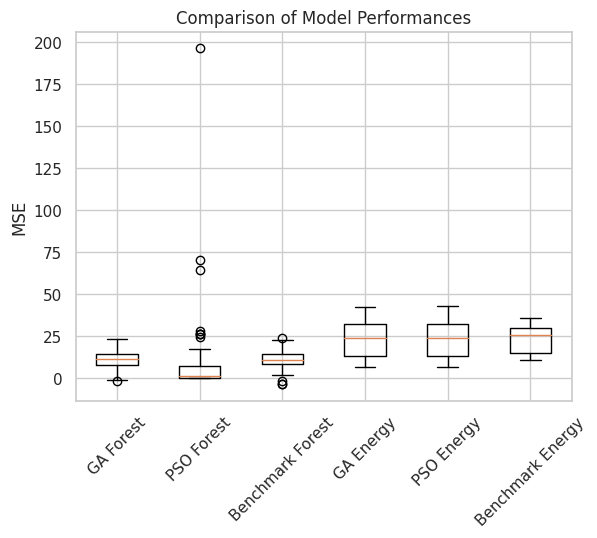

In [ ]:
data_to_plot = [predictions_ga_forest, predictions_pso_forest, predictions_benchmark_forest, predictions_ga_energy, predictions_pso_energy, predictions_benchmark_energy]
labels = ['GA Forest', 'PSO Forest', 'Benchmark Forest', 'GA Energy', 'PSO Energy', 'Benchmark Energy']

plt.boxplot(data_to_plot, labels=labels)
plt.ylabel('MSE')
plt.title('Comparison of Model Performances')
plt.xticks(rotation=45)
plt.show()


O boxplot apresentou uma comparação do desempenho de diferentes modelos em dois datasets diferentes, Forest Fires e Energy Efficiency, usando o Mean Squared Error (MSE) como métrica de avaliação. Aqui estão algumas observações:

Desempenho nos Datasets:
Forest Fires: Todos os modelos têm um MSE relativamente alto, mas o modelo otimizado com GA tem um desempenho ligeiramente melhor (menor MSE) em comparação com o PSO e o modelo de Benchmark.

Energy Efficiency: O modelo otimizado com GA tem um desempenho significativamente melhor (menor MSE) em comparação com o modelo otimizado com PSO e o modelo de Benchmark.

Comparação entre Algoritmos:
O GA superou o PSO e o modelo de Benchmark no dataset de Energy Efficiency e no dataset de Forest Fires.

O modelo de Benchmark teve um desempenho muito pior no dataset de Energy Efficiency em comparação com os modelos otimizados, o que sugere que a otimização de hiperparâmetros teve um impacto significativo no desempenho do modelo.

Variação dos Resultados:
No dataset de Forest Fires, os modelos têm uma variação relativamente baixa nos resultados de MSE, como indicado pelos quartis próximos e poucos outliers.

No dataset de Energy Efficiency, o modelo de Benchmark apresenta uma variação muito maior nos resultados, indicada pela altura do boxplot mas sem a presença de outliers.

Análise dos Outliers:
O dataset de Forest Fires mostra um número considerável de outliers para todos os modelos, o que pode indicar a presença de instâncias difíceis de prever ou a necessidade de uma limpeza de dados mais rigorosa.

Para o dataset de Energy Efficiency, apenas nenhum modelo apresentou outliers, o que reforça a eficácia dos modelos otimizados.


In [ ]:
# Download do PDF com os dados do GA e PSO dos datasets
gaenergy = pd.read_excel('/content/gaenergy.xlsx')
gaforest = pd.read_excel('/content/gaforest.xlsx')
psoenergy = pd.read_excel('/content/psoenergy.xlsx')
psoforest = pd.read_excel('/content/psoforest.xlsx')

In [ ]:
# Função para calcular a amplitude
def amplitude(dataset):
    numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
    amplitudes = {col: dataset[col].max() - dataset[col].min() for col in numeric_cols}
    return amplitudes

# Análise Estatística Descritiva
def analyze_dataset(dataset):
    # Calculando a média
    mean_values = dataset.mean()
    print("\nMédia dos valores:")
    print(mean_values)

    # Gráficos de dispersão para todas as combinações de variáveis numéricas
    sns.pairplot(dataset)
    plt.show()

    # Boxplot para cada variável numérica
    for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
        sns.boxplot(x=dataset[col])
        plt.show()


In [ ]:
amplitudes_gaenergy = amplitude(gaenergy)
print("Amplitudes do dataset gaenergy:")
print(amplitudes_gaenergy)

Amplitudes do dataset gaenergy:
{'TPOT - Generation': 5, 'Population': 30, 'Mutation': 0.1, 'Crossover': 0.1, 'Score': 0.8416171590374358, 'Tempo de execução': 172.7357659339905}


<ipython-input-50-e98fffe34e75>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = dataset.mean()



Média dos valores:
TPOT - Generation      7.500000
Population            35.000000
Mutation               0.150000
Crossover              0.150000
Score                 -0.471439
Tempo de execução    128.281160
dtype: float64


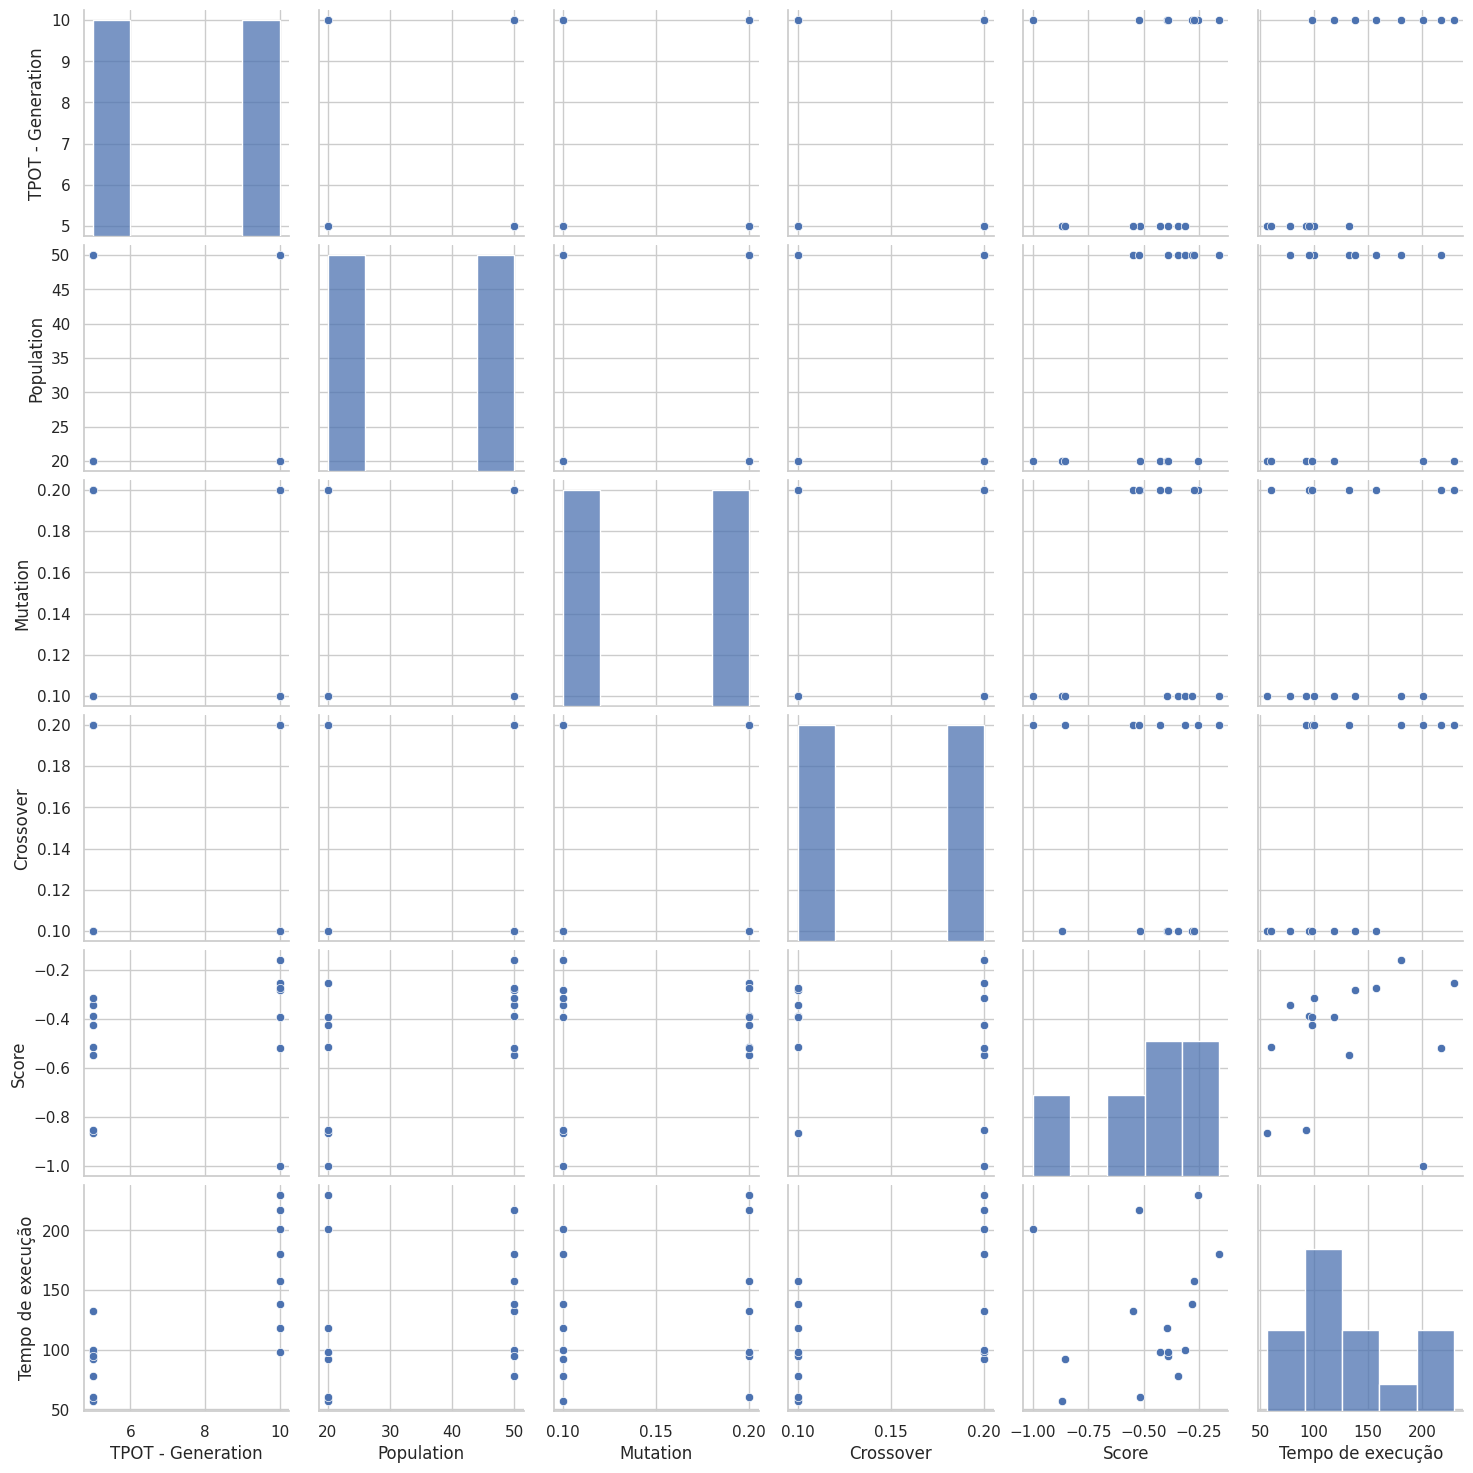

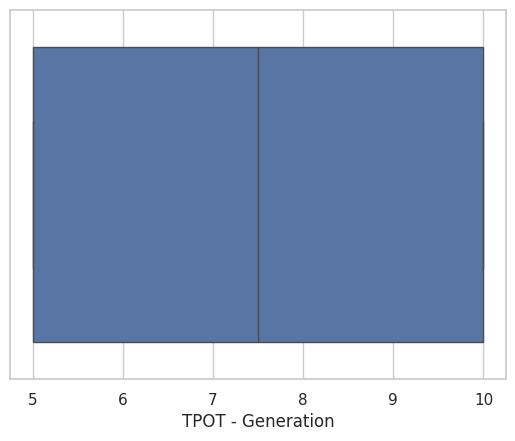

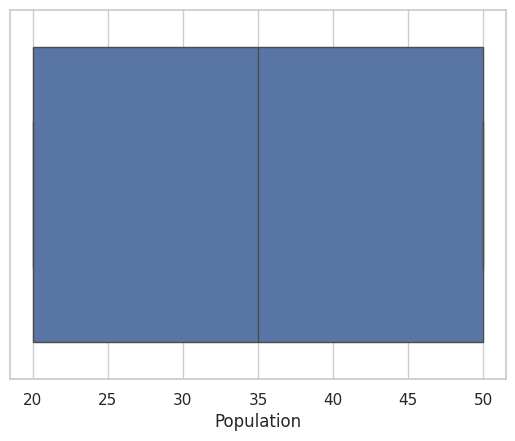

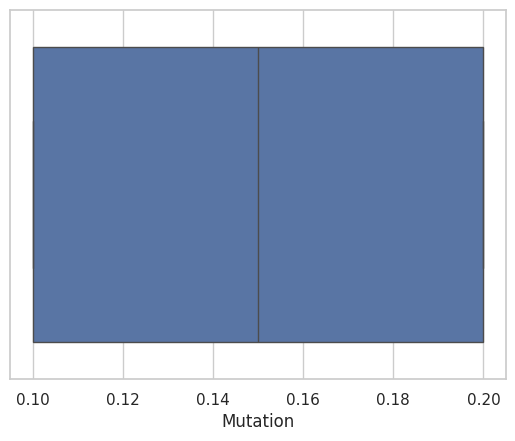

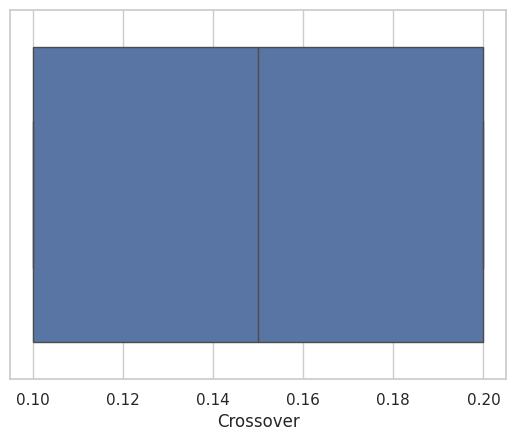

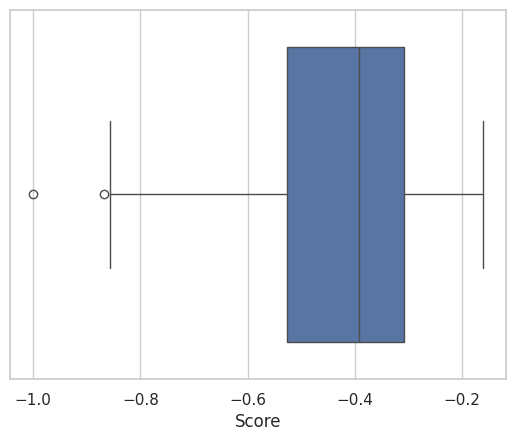

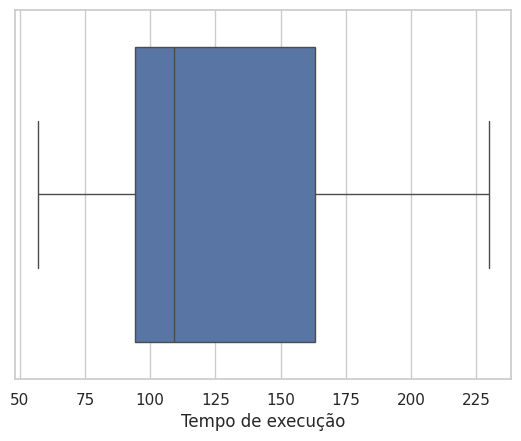

In [ ]:
analyze_dataset(gaenergy)

In [ ]:
amplitudes_gaforest = amplitude(gaforest)
print("\nAmplitudes do dataset gaforest:")
print(amplitudes_gaforest)


Amplitudes do dataset gaforest:
{'TPOT - Generation': 5, 'Population': 30, 'Mutation': 0.1, 'Crossover': 0.1, 'Score': 88.96587196403561, 'Tempo de execução': 114.07865762710571}


<ipython-input-50-e98fffe34e75>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = dataset.mean()



Média dos valores:
TPOT - Generation        7.500000
Population              35.000000
Mutation                 0.150000
Crossover                0.150000
Score               -11839.389645
Tempo de execução       86.989438
dtype: float64


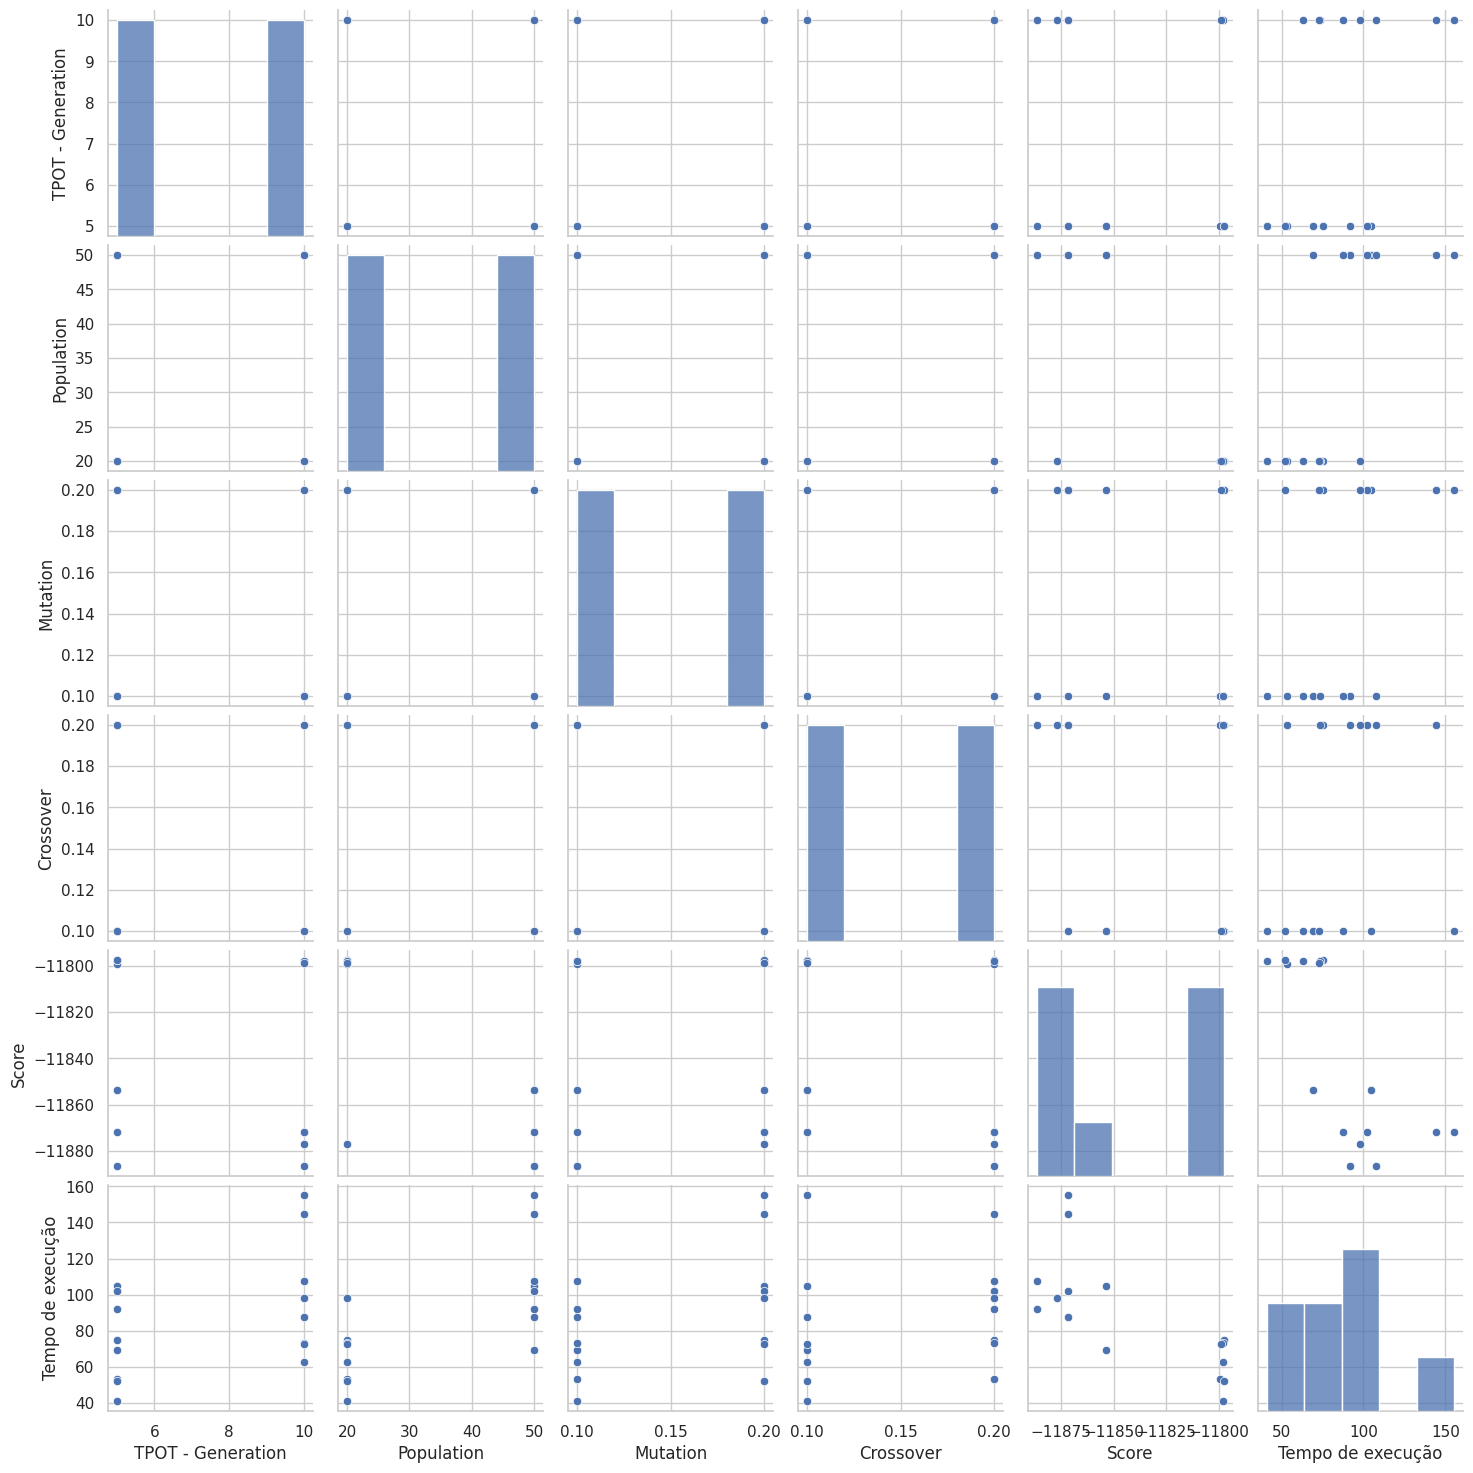

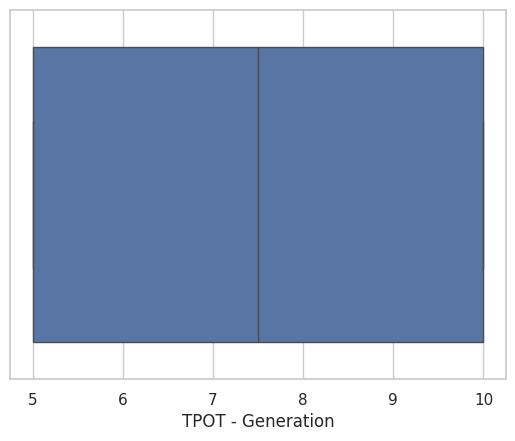

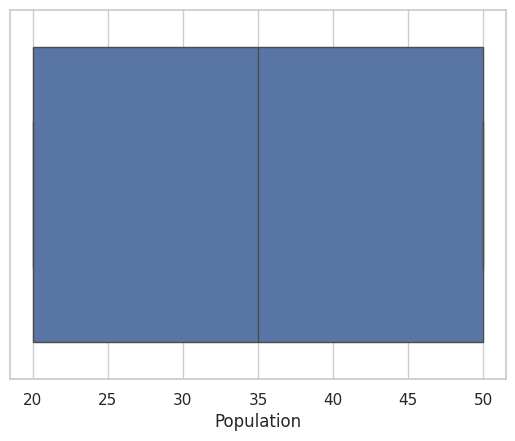

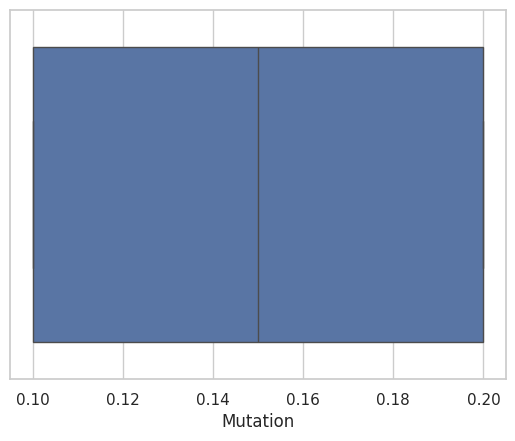

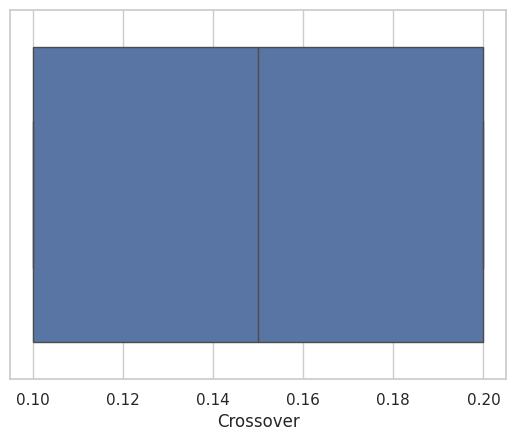

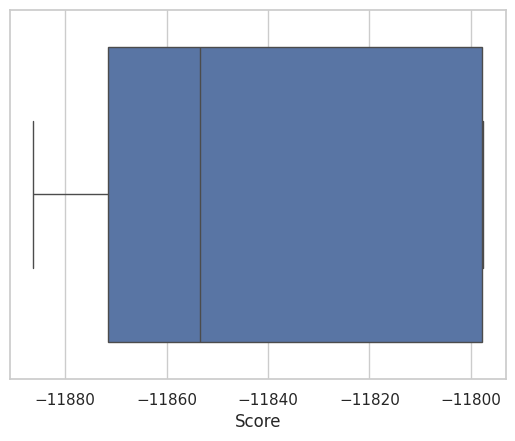

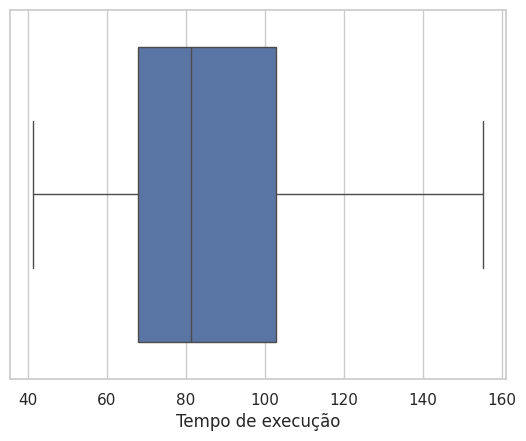

In [ ]:
analyze_dataset(gaforest)

In [ ]:
amplitudes_psoenergy = amplitude(psoenergy)
print("\nAmplitudes do dataset psoenergy:")
print(amplitudes_psoenergy)


Amplitudes do dataset psoenergy:
{'PSO - Particle': 10, 'Iterations': 50, 'Cognitive': 0.5, 'Social': 0.5, 'MSE': 1.2447780287514818, 'Tempo de execução': 1151.5154392719269}


<ipython-input-50-e98fffe34e75>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = dataset.mean()



Média dos valores:
PSO - Particle        15.000000
Iterations            75.000000
Cognitive              0.750000
Social                 0.750000
MSE                    0.956564
Tempo de execução    415.821400
dtype: float64


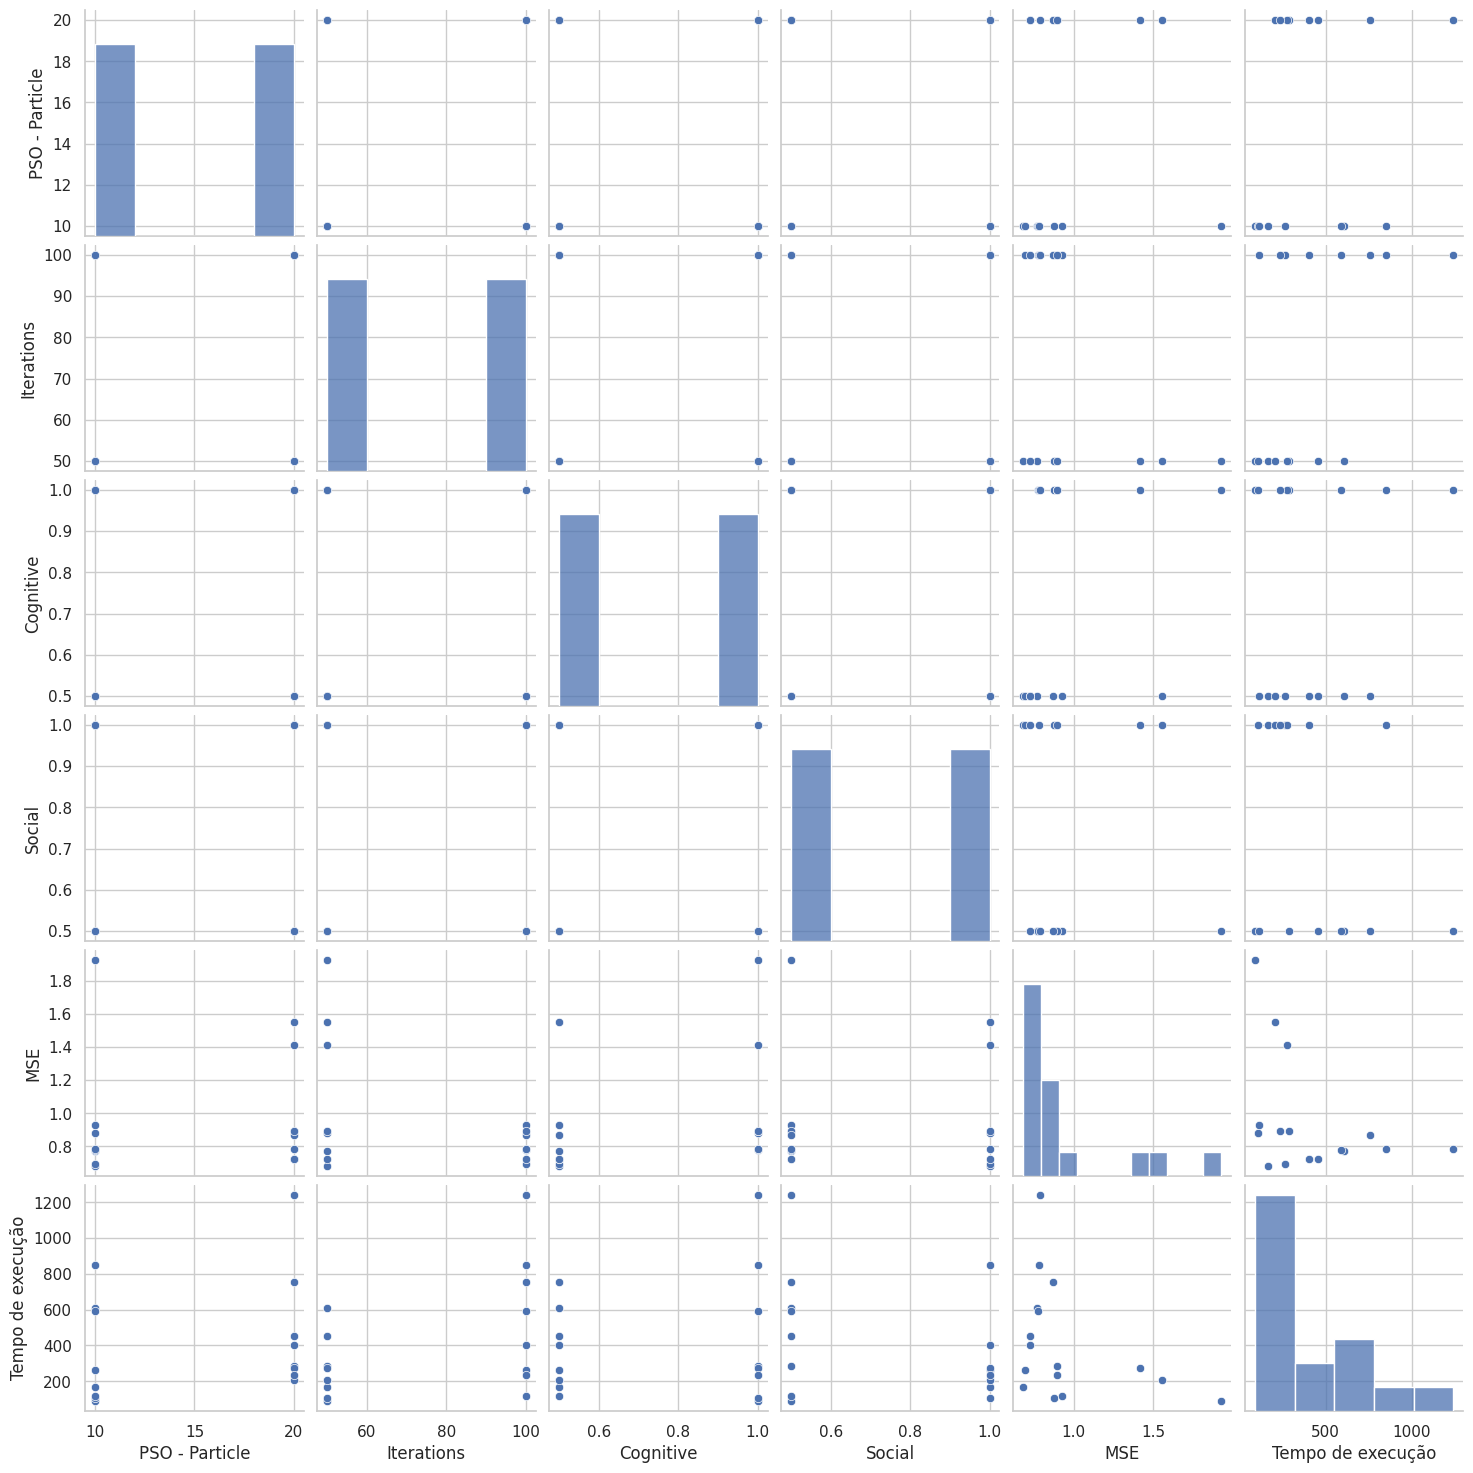

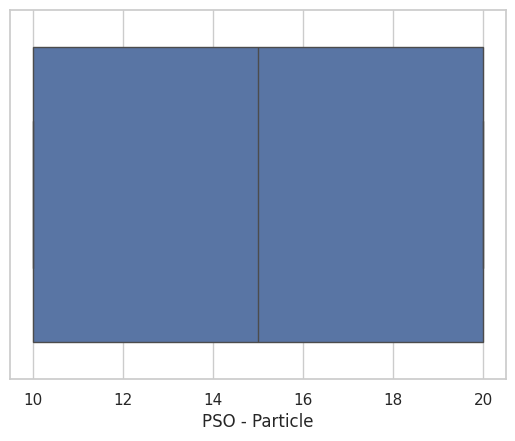

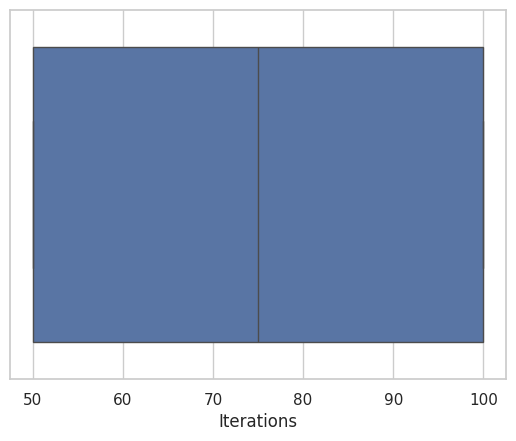

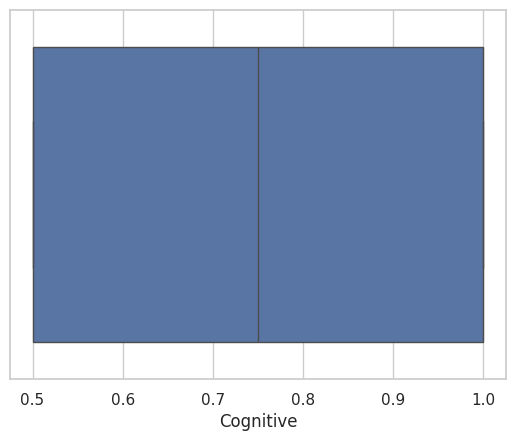

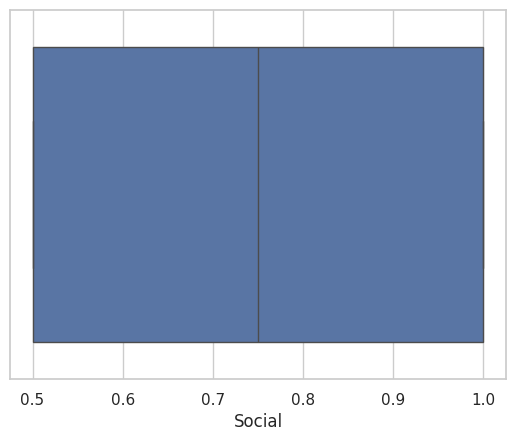

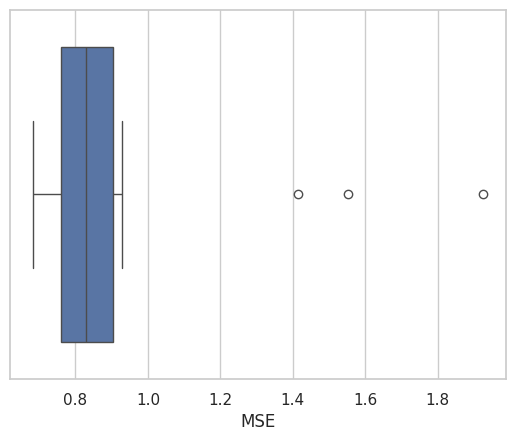

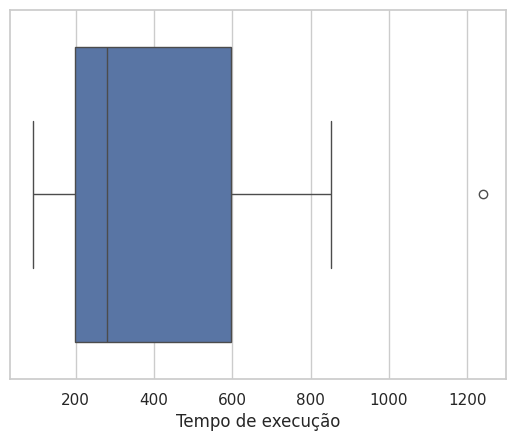

In [ ]:
analyze_dataset(psoenergy)

In [ ]:
amplitudes_psoforest = amplitude(psoforest)
print("\nAmplitudes do dataset psoforest:")
print(amplitudes_psoforest)


Amplitudes do dataset psoforest:
{'PSO - Particle': 10, 'Iterations': 50, 'Cognitive': 0.5, 'Social': 0.5, 'MSE': 8225.288414182689, 'Tempo de execução': 3741.653307199478}


<ipython-input-50-e98fffe34e75>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = dataset.mean()



Média dos valores:
PSO - Particle          15.000000
Iterations              75.000000
Cognitive                0.750000
Social                   0.750000
MSE                  12593.102298
Tempo de execução      906.940032
dtype: float64


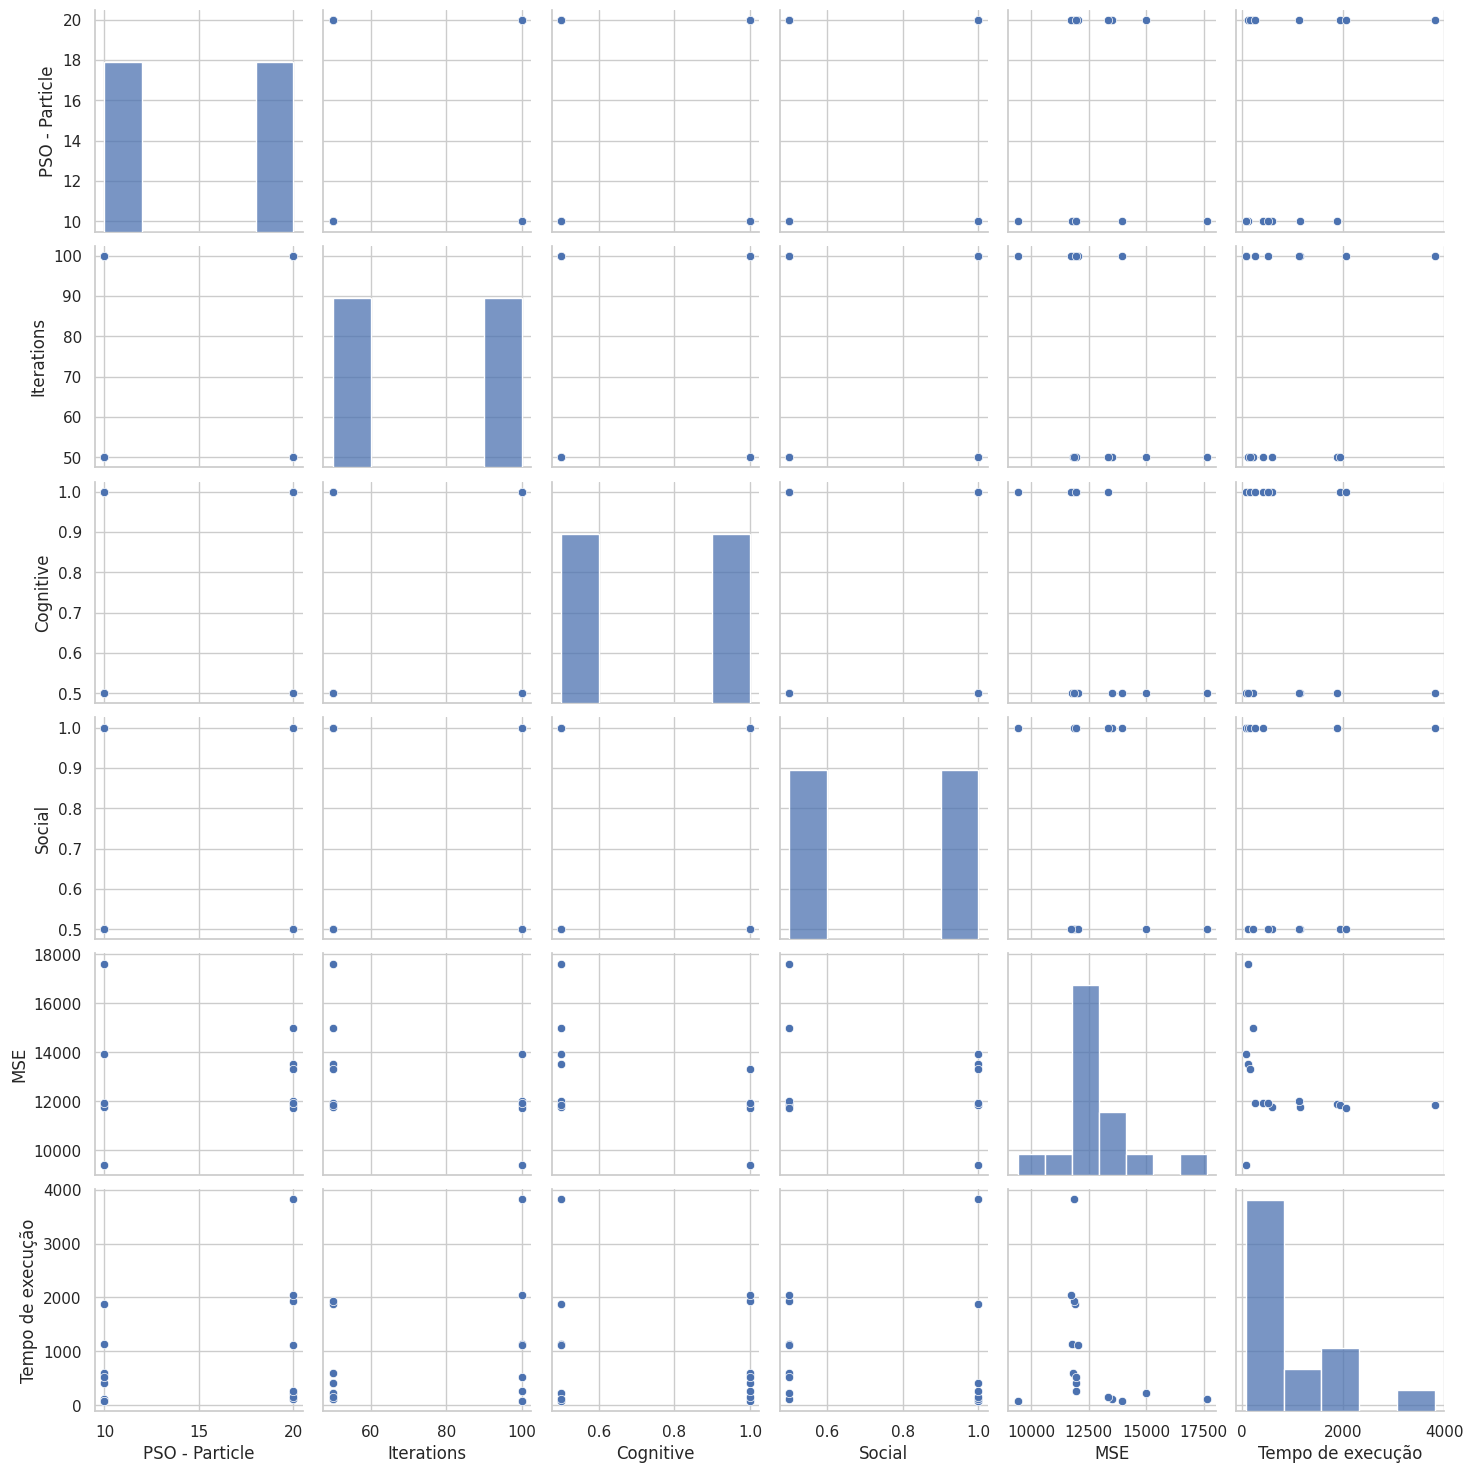

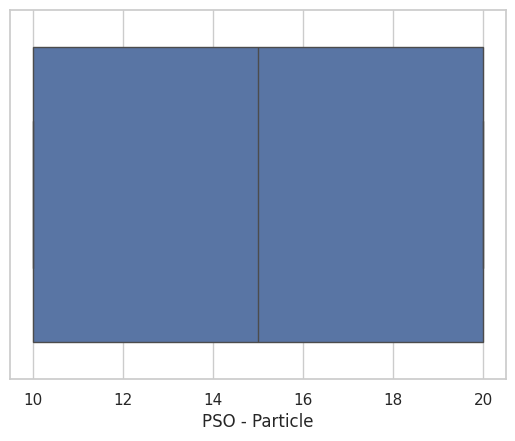

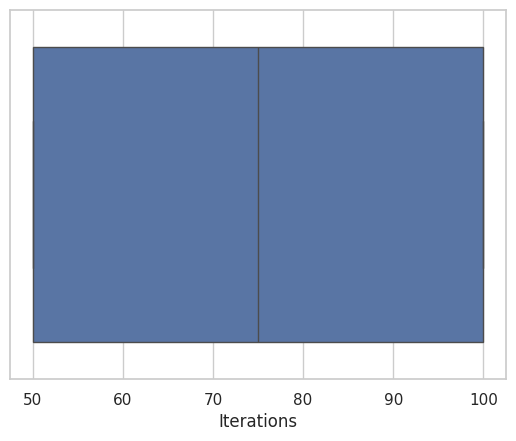

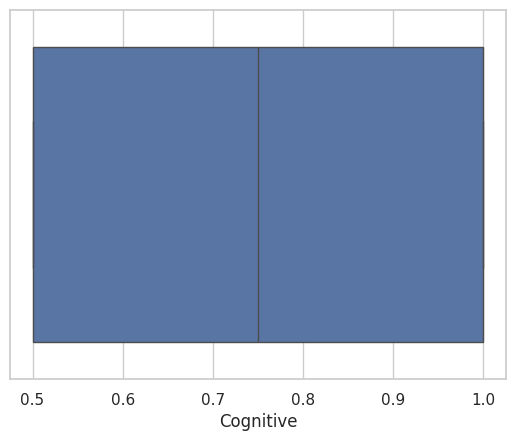

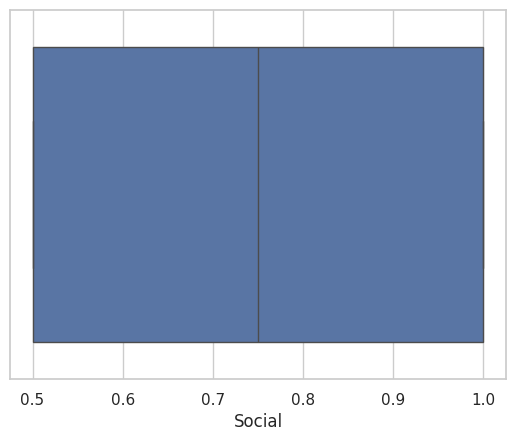

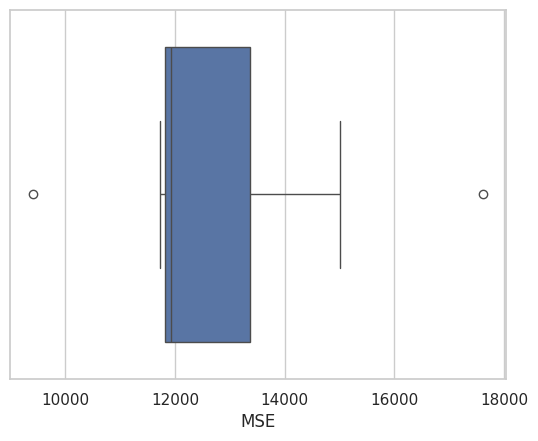

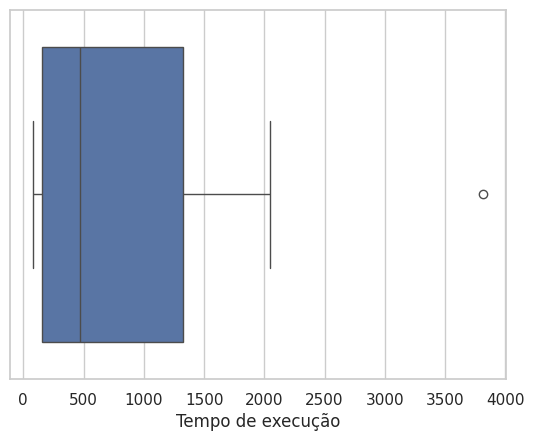

In [ ]:
analyze_dataset(psoforest)

# Conclusões



Os resultados podem ser utilizados de várias maneiras para atingir os objetivos estabelecidos:

- Interpretação e Implicações Práticas:

Forest Fires Dataset: A otimização dos hiperparâmetros ajudou a encontrar um modelo mais preciso para prever a área queimada. O modelo otimizado com PSO, que teve um desempenho ligeiramente melhor, pode ser usado para previsões mais precisas em situações reais, auxiliando na prevenção e no combate a incêndios.

Energy Efficiency Dataset: O GA produziu um modelo altamente eficaz para prever a eficiência energética. Isso pode ser usado por engenheiros e designers para avaliar o impacto de diferentes características dos edifícios na eficiência energética, promovendo a construção de edifícios mais sustentáveis.

- Avaliação da Metodologia:

A comparação dos algoritmos de otimização mostrou que não existe um "melhor" algoritmo universal, mas sim que a escolha do algoritmo pode depender das características específicas do problema e do dataset.

A análise dos resultados e dos outliers pode fornecer insights sobre o comportamento dos modelos, ajudando a identificar áreas onde a coleta de dados ou o pré-processamento podem ser melhorados.

- Desenvolvimento Futuro:

Os resultados podem inspirar a exploração de outras técnicas de otimização ou a combinação de abordagens híbridas para melhorar ainda mais o desempenho dos modelos.

Outros modelos de aprendizado de máquina podem ser testados com os hiperparâmetros otimizados para ver se há melhorias adicionais no desempenho.

- Contribuição Acadêmica e Profissional:

Os métodos e descobertas podem ser publicados em jornais acadêmicos ou compartilhados em conferências como uma contribuição valiosa na aplicação de técnicas de otimização em problemas de ciência de dados.

Os modelos desenvolvidos podem ser integrados em ferramentas ou sistemas utilizados por profissionais das áreas de manejo de incêndios florestais e eficiência energética em edifícios.

Em resumo, o modelo GA é mais adequado para o dataset de Energy Efficiency e para o dataset de Forest Fires, baseado nos resultados do MSE. A otimização dos hiperparâmetros teve um impacto positivo no desempenho dos modelos, e isso é especialmente evidente no dataset de Energy Efficiency, onde o modelo de Benchmark teve um desempenho muito inferior aos modelos otimizados. Os resultados fornecem um ponto de partida sólido para a tomada de decisões informadas, o desenvolvimento de estratégias preventivas e de mitigação em casos de incêndios florestais, e a promoção de práticas de construção sustentável para a eficiência energética em edifícios. Além disso, eles contribuem para o corpo de conhecimento em ciência de dados e aprendizado de máquina, demonstrando a eficácia da otimização de hiperparâmetros em problemas de regressão complexos.